# investigating hypoxic control treatment

this treatment resulted in 3 pairwise comparisons with DMGs - interested if all of these DMGs are unique to hypoxia control (HC)

In [57]:
library(tidyverse)
library(ggvenn)
library(dplyr)
library(RColorBrewer)

###### for KEGG analysis ######
library(topGO)
library(KEGGREST)
library(clusterProfiler)
library(ggridges)
library(httr)

### loading and formatting

In [2]:
# importing csv files

#1 control control vs. hypoxic control
CC_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CC_vs_HC.csv')

#2 control hypoxic vs. hypoxic control
CH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CH_vs_HC.csv')

#3 hypoxic hypoxic vs. hypoxic control
HH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/HH_vs_HC.csv')

#######################################

#4 hypoxic hypoxic vs. control hypoxic
HH_CH <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/HH_vs_CH.csv')

#5 hypoxic hypoxic vs. control control
HH_CC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CC_vs_HH.csv')

#6 control control vs. control hypoxic
CC_CH <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CC_vs_CH.csv')


pulling out significant DMGs for the three pairwise comparisons with HC (adjusted p-value < 0.05)

In [3]:
# significant DMGs

# control control vs. hypoxic control
sig_CC_HC <- filter(CC_HC, CC_HC$padj < 0.05)
dim(sig_CC_HC) # 20 total sig DMGs

# control hypoxic vs. hypoxic control
sig_CH_HC <- filter(CH_HC, CH_HC$padj < 0.05)
dim(sig_CH_HC) # 258 total sig DMGs

# hypoxic hypoxic vs. hypoxic control
sig_HH_HC <- filter(HH_HC, HH_HC$padj < 0.05)
dim(sig_HH_HC) # 124 total sig DMGs

[1] 20  7

[1] 258   7

[1] 124   7

adding columns to the dfs - need to assign which direction the methylation is in order to assign colors in the plots - also adding a column to denote what the pairwise comparison is in case I end up combining dataframes and faceting by this later on... 

In [4]:
# column 'pair' to denote the pairwise comparison this data is originally from 
CC_HC$pair <- 'CC_HC' #1
CH_HC$pair <- 'CH_HC' #2
HH_HC$pair <- 'HH_HC' #3
HH_CH$pair <- 'HH_CH' #4
HH_CC$pair <- 'HH_CC' #5
CC_CH$pair <- 'CC_CH' #6

In [5]:
#1 control control vs. hypoxic control
CC_HC$methyl <- ifelse(CC_HC$log2FoldChange<0 & CC_HC$padj < 0.05, "CC", 
                        ifelse(CC_HC$log2FoldChange>0 & CC_HC$padj < 0.05, "HC", 
                               "not significant"))

#2 control hypoxic vs. hypoxic control
CH_HC$methyl <- ifelse(CH_HC$log2FoldChange<0 & CH_HC$padj < 0.05, "CH", 
                        ifelse(CH_HC$log2FoldChange>0 & CH_HC$padj < 0.05, "HC", 
                               "not significant"))

#3 hypoxic hypoxic vs. hypoxic control
HH_HC$methyl <- ifelse(HH_HC$log2FoldChange<0 & HH_HC$padj < 0.05, "HC", 
                        ifelse(HH_HC$log2FoldChange>0 & HH_HC$padj < 0.05, "HH", 
                               "not significant"))

#4 hypoxic hypoxic vs. control hypoxic
HH_CH$methyl <- ifelse(HH_CH$log2FoldChange<0 & HH_CH$padj < 0.05, "CH",
                        ifelse(HH_CH$log2FoldChange>0 & HH_CH$padj < 0.05, "HH", 
                               "not significant"))

#5 hypoxic hypoxic vs. control control
HH_CC$methyl <- ifelse(HH_CC$log2FoldChange<0 & HH_CC$padj < 0.05, "CC", 
                        ifelse(HH_CC$log2FoldChange>0 & HH_CC$padj < 0.05, "HH", 
                               "not significant"))



#6 control control vs. control hypoxic
CC_CH$methyl <- ifelse(CC_CH$log2FoldChange<0 & CC_CH$padj < 0.05, "CC", 
                        ifelse(CC_CH$log2FoldChange>0 & CC_CH$padj < 0.05, "CH", 
                               "not significant"))


### ggplot Volcano plots 
Volcano plots made with ggplot of the pairwise comparisons from DESeq2

In [6]:
# to change size of plots
options(repr.plot.width=10, repr.plot.height=5)

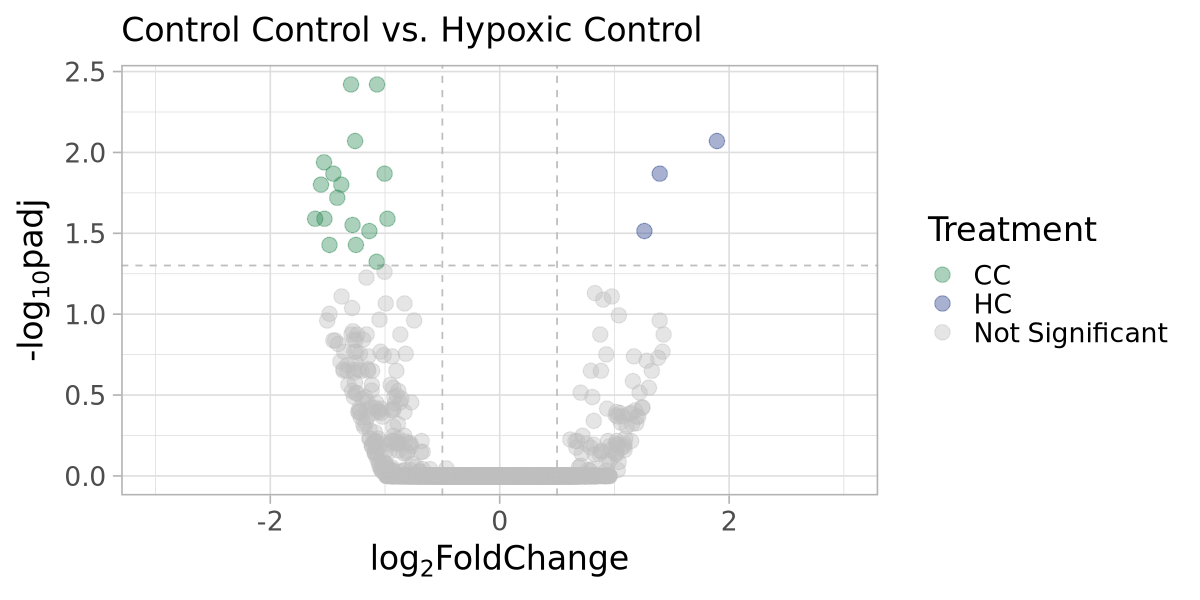

In [7]:
#1 control control vs. hypoxic control
CC_HC <- na.omit(CC_HC) # removing rows with NA for padj

volcano1 <- ggplot(data = CC_HC, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('seagreen4','royalblue4', 'gray'),
                                           labels=c('CC', 'HC', 'Not Significant')) + 
                        theme_light(base_size=20) + 
                       labs(subtitle = 'Control Control vs. Hypoxic Control',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano1

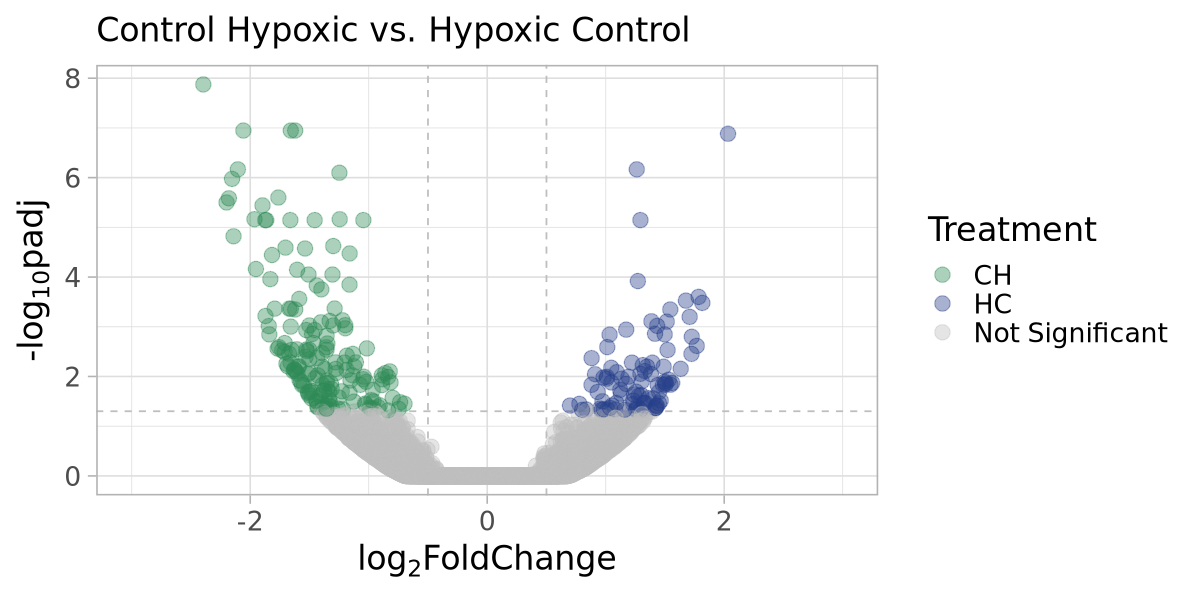

In [8]:
#2 control hypoxic vs. hypoxic control
CH_HC <- na.omit(CH_HC) # removing rows with NA for padj

volcano2 <- ggplot(data = CH_HC, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('seagreen4','royalblue4', 'gray'),
                                           labels=c('CH', 'HC', 'Not Significant')) + 
                        theme_light(base_size=20) + 
                        labs(subtitle = 'Control Hypoxic vs. Hypoxic Control',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano2

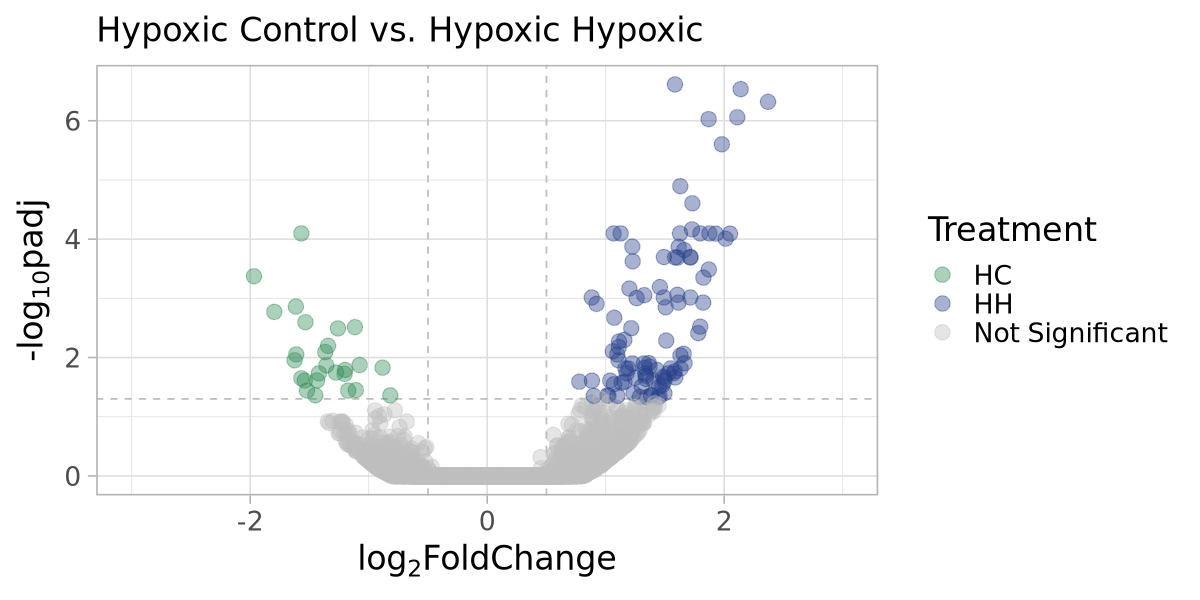

In [9]:
#3 hypoxic hypoxic vs. hypoxic control
HH_HC <- na.omit(HH_HC) # removing rows with NA for padj

volcano3 <- ggplot(data = HH_HC, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('seagreen4','royalblue4', 'gray'),
                                           labels=c('HC', 'HH', 'Not Significant')) + 
                        theme_light(base_size=20) + 
                        labs(subtitle = 'Hypoxic Control vs. Hypoxic Hypoxic',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano3

want to actually flip the above plot so that HC is on the right and HH is on the left - to do this, make pos. LFC to neg and vice versa

In [10]:
# Switch the signs
HH_HC_flip <- HH_HC %>%
  mutate(log2FoldChange = -log2FoldChange)

HH_HC_flip$methyl <- ifelse(HH_HC_flip$log2FoldChange<0 & HH_HC_flip$padj < 0.05, "HH", 
                        ifelse(HH_HC_flip$log2FoldChange>0 & HH_HC_flip$padj < 0.05, "HC", 
                               "not significant"))

# View the modified dataframe
head(HH_HC_flip)
head(HH_HC)


,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pair,methyl
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
3,LOC111124802,213.00131,0.07669030,0.1125398,0.0000000,1.000000e+00,1.0000000000,HH_HC,not significant
4,LOC111101273,76.71302,0.06379838,0.1495362,0.0000000,1.000000e+00,1.0000000000,HH_HC,not significant
5,LOC111101250,123.47481,0.04446060,0.1737339,0.0000000,1.000000e+00,1.0000000000,HH_HC,not significant
6,LOC111101262,269.44440,0.07196657,0.1174022,0.0000000,1.000000e+00,1.0000000000,HH_HC,not significant
7,LOC111133260,29.44709,-1.58573394,0.2666112,5.0100451,5.441729e-07,0.0002034527,HH_HC,HH
8,LOC111113503,16.75282,0.47230058,0.2772601,-0.8017763,4.226824e-01,1.0000000000,HH_HC,not significant


,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pair,methyl
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
3,LOC111124802,213.00131,-0.07669030,0.1125398,0.0000000,1.000000e+00,1.0000000000,HH_HC,not significant
4,LOC111101273,76.71302,-0.06379838,0.1495362,0.0000000,1.000000e+00,1.0000000000,HH_HC,not significant
5,LOC111101250,123.47481,-0.04446060,0.1737339,0.0000000,1.000000e+00,1.0000000000,HH_HC,not significant
6,LOC111101262,269.44440,-0.07196657,0.1174022,0.0000000,1.000000e+00,1.0000000000,HH_HC,not significant
7,LOC111133260,29.44709,1.58573394,0.2666112,5.0100451,5.441729e-07,0.0002034527,HH_HC,HH
8,LOC111113503,16.75282,-0.47230058,0.2772601,-0.8017763,4.226824e-01,1.0000000000,HH_HC,not significant


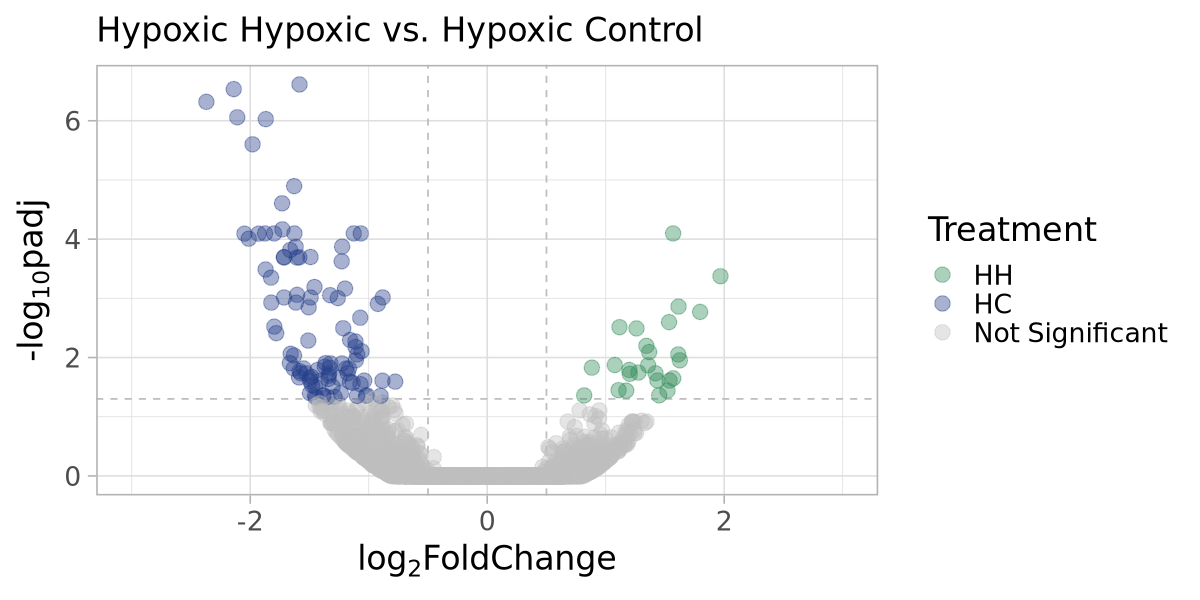

In [11]:
#3 hypoxic hypoxic vs. hypoxic control FLIPPED
volcano3.5 <- ggplot(data = HH_HC_flip, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('seagreen4','royalblue4', 'gray'),
                                           labels=c('HH', 'HC', 'Not Significant')) + 
                        theme_light(base_size=20) + 
                        labs(subtitle = 'Hypoxic Hypoxic vs. Hypoxic Control',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano3.5

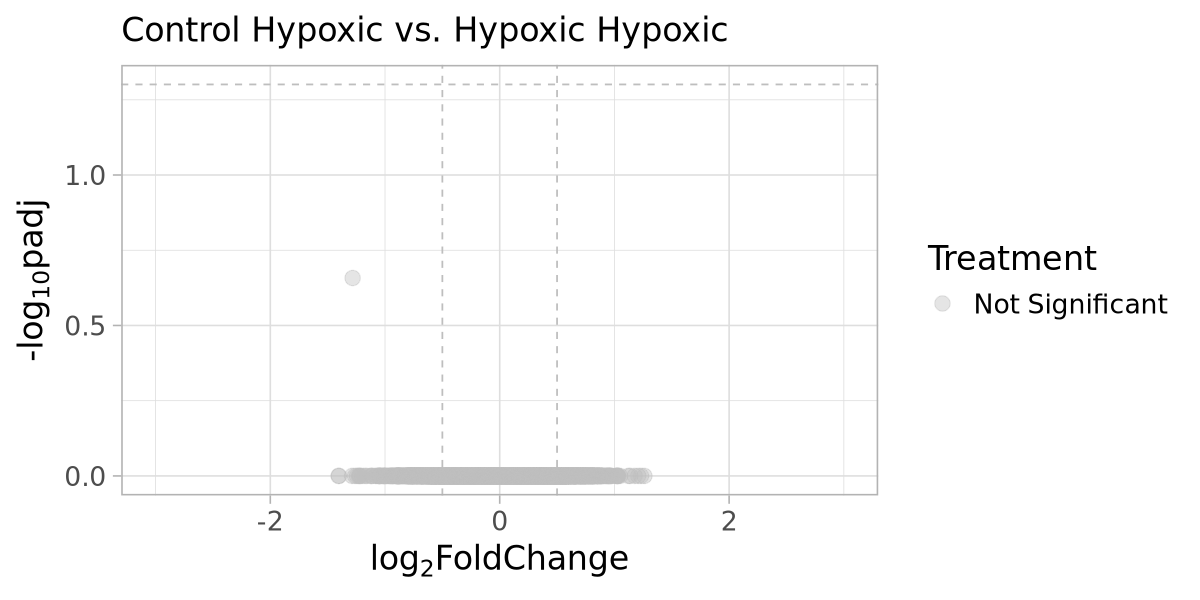

In [12]:
#4 hypoxic hypoxic vs. control hypoxic
HH_CH <- na.omit(HH_CH) # removing rows with NA for padj

volcano4 <- ggplot(data = HH_CH, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('gray'),
                                           labels=c('Not Significant')) + 
                        theme_light(base_size=20) + 
                        labs(subtitle = 'Control Hypoxic vs. Hypoxic Hypoxic',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano4

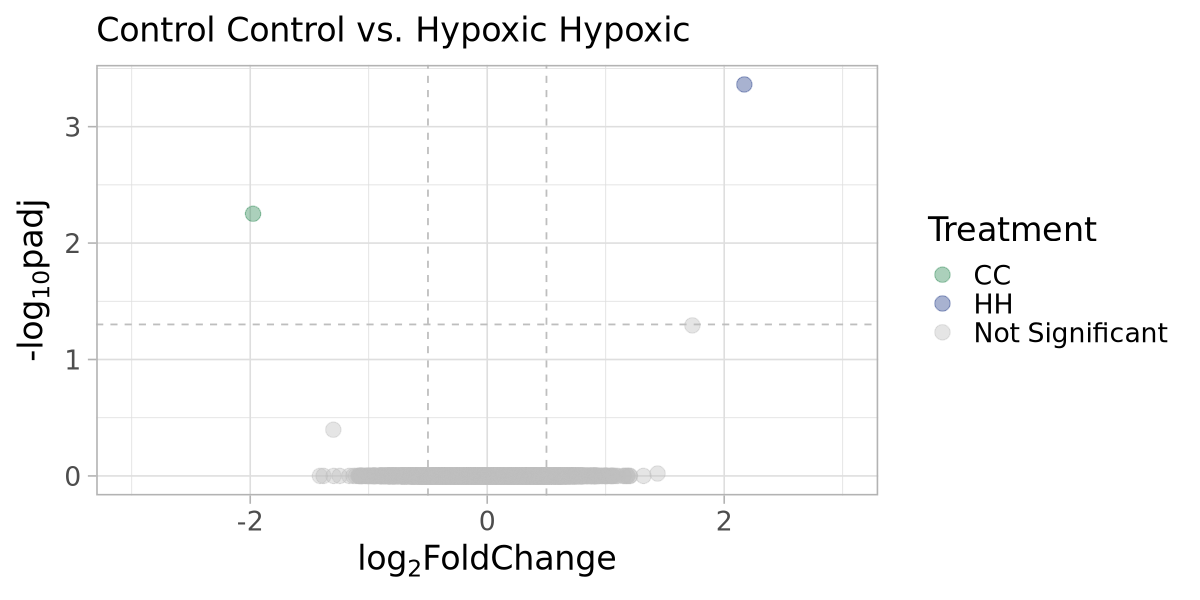

In [13]:
#5 hypoxic hypoxic vs. control control
HH_CC <- na.omit(HH_CC) # removing rows with NA for padj

volcano5 <- ggplot(data = HH_CC, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('seagreen4','royalblue4', 'gray'),
                                           labels=c('CC', 'HH', 'Not Significant')) + 
                        theme_light(base_size=20) + 
                        labs(subtitle = 'Control Control vs. Hypoxic Hypoxic',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano5

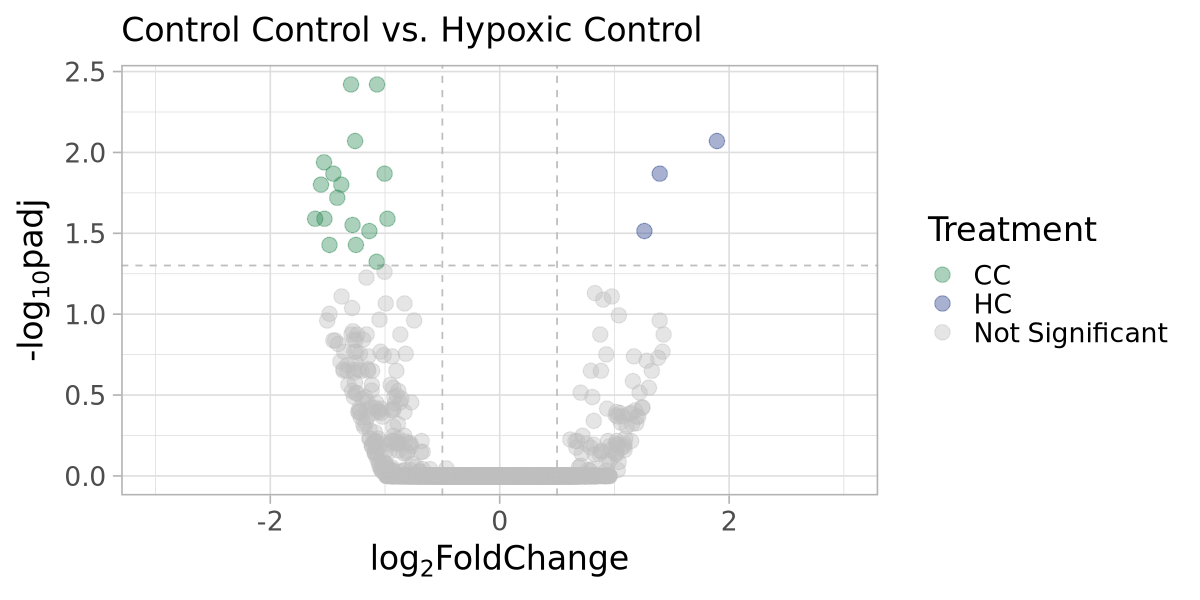

In [14]:
#6 control control vs. control hypoxic
CC_HC <- na.omit(CC_HC) # removing rows with NA for padj

volcano6 <- ggplot(data = CC_HC, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('seagreen4','royalblue4', 'gray'),
                                           labels=c('CC', 'HC', 'Not Significant')) + 
                        theme_light(base_size=20) + 
                        labs(subtitle = 'Control Control vs. Hypoxic Control',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano6

putting all the data together into one ggplot grid...

In [15]:
mega_df <- na.omit(rbind(CC_HC, CH_HC, HH_HC_flip, HH_CH, HH_CC, CC_CH))
head(mega_df)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pair,methyl
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
3,LOC111124802,213.00131,0.06672759,0.1192547,0.0000000,1.000000e+00,1.00000000,CC_HC,not significant
4,LOC111101273,76.71302,-0.20267259,0.1576994,0.0000000,1.000000e+00,1.00000000,CC_HC,not significant
5,LOC111101250,123.47481,-0.13501125,0.1799700,0.0000000,1.000000e+00,1.00000000,CC_HC,not significant
6,LOC111101262,269.44440,0.14318006,0.1234759,0.0000000,1.000000e+00,1.00000000,CC_HC,not significant
7,LOC111133260,29.44709,-1.41645334,0.2784943,-4.1884287,2.808925e-05,0.01908026,CC_HC,CC
8,LOC111113503,16.75282,0.37259562,0.2901756,0.4224877,6.726691e-01,1.00000000,CC_HC,not significant


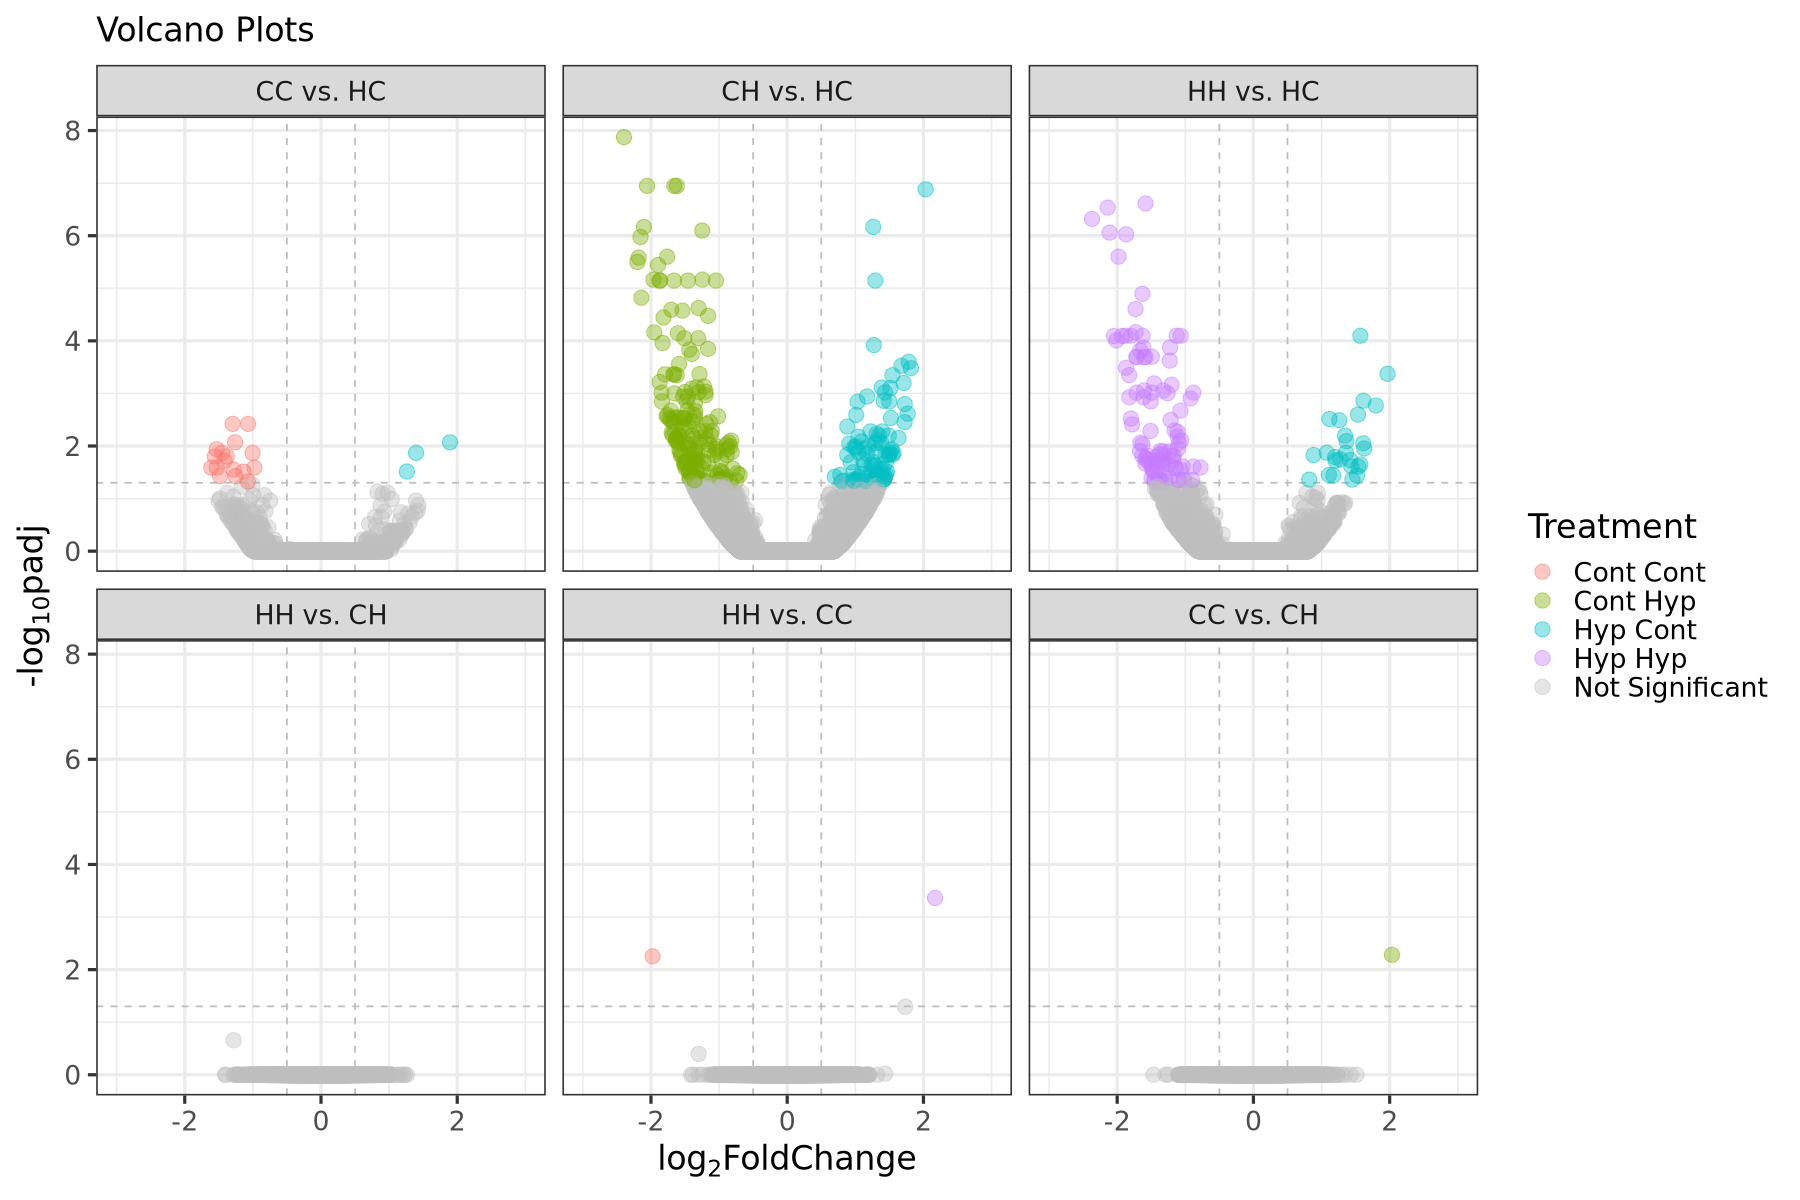

In [16]:
options(repr.plot.width=15, repr.plot.height=10)

# setting order of grids for facet_wrap
mega_df$pair <- factor(mega_df$pair, levels = c('CC_HC','CH_HC','HH_HC', 'HH_CH','HH_CC','CC_CH'))

# renaming grid labels
new_labels <- c(CC_HC = "CC vs. HC", 
                CH_HC = "CH vs. HC", 
                HH_HC = "HH vs. HC",
               HH_CH = "HH vs. CH",
               HH_CC = "HH vs. CC",
               CC_CH = "CC vs. CH")

volcano_MEGA <- ggplot(data = mega_df, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
scale_color_manual(values = c('#F8766D','#7CAE00', '#00BFC4', '#C77CFF', 'gray'),
                                           labels=c('Cont Cont','Cont Hyp', 'Hyp Cont', 'Hyp Hyp', 'Not Significant')) + 
facet_wrap(~pair, labeller = as_labeller(new_labels)) + 
                        theme_bw(base_size=20) + 
                        labs(subtitle = 'Volcano Plots',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano_MEGA

just adding another option for how things are labelled

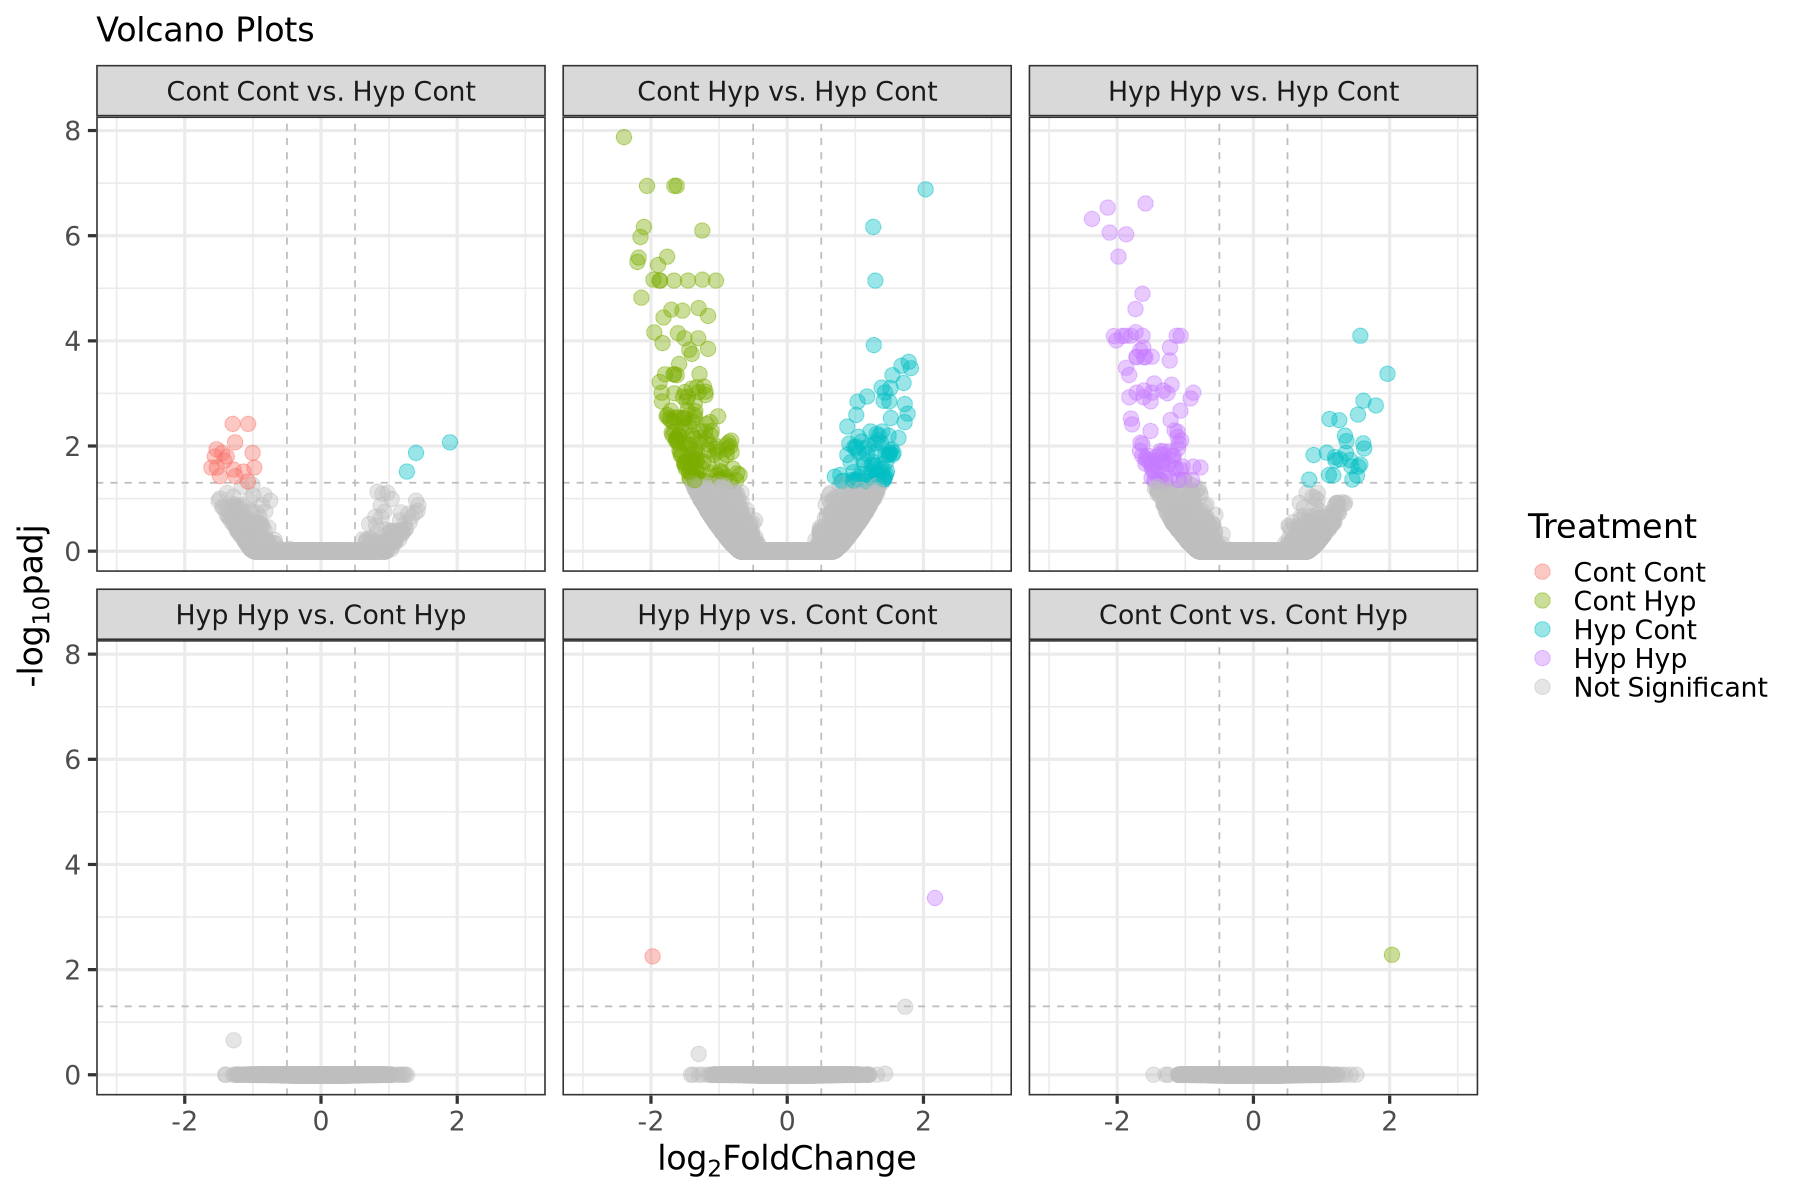

In [17]:
options(repr.plot.width=15, repr.plot.height=10)

# setting order of grids for facet_wrap
mega_df$pair <- factor(mega_df$pair, levels = c('CC_HC','CH_HC','HH_HC', 'HH_CH','HH_CC','CC_CH'))

# renaming grid labels
new_labels <- c(CC_HC = "Cont Cont vs. Hyp Cont", 
                CH_HC = "Cont Hyp vs. Hyp Cont", 
                HH_HC = "Hyp Hyp vs. Hyp Cont",
               HH_CH = "Hyp Hyp vs. Cont Hyp",
               HH_CC = "Hyp Hyp vs. Cont Cont",
               CC_CH = "Cont Cont vs. Cont Hyp")

volcano_MEGA <- ggplot(data = mega_df, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
scale_color_manual(values = c('#F8766D','#7CAE00', '#00BFC4', '#C77CFF', 'gray'),
                                           labels=c('Cont Cont','Cont Hyp', 'Hyp Cont', 'Hyp Hyp', 'Not Significant')) + 
facet_wrap(~pair, labeller = as_labeller(new_labels)) + 
                        theme_bw(base_size=20) + 
                        labs(subtitle = 'Volcano Plots',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano_MEGA

### Venn diagram of all sig. DMGs

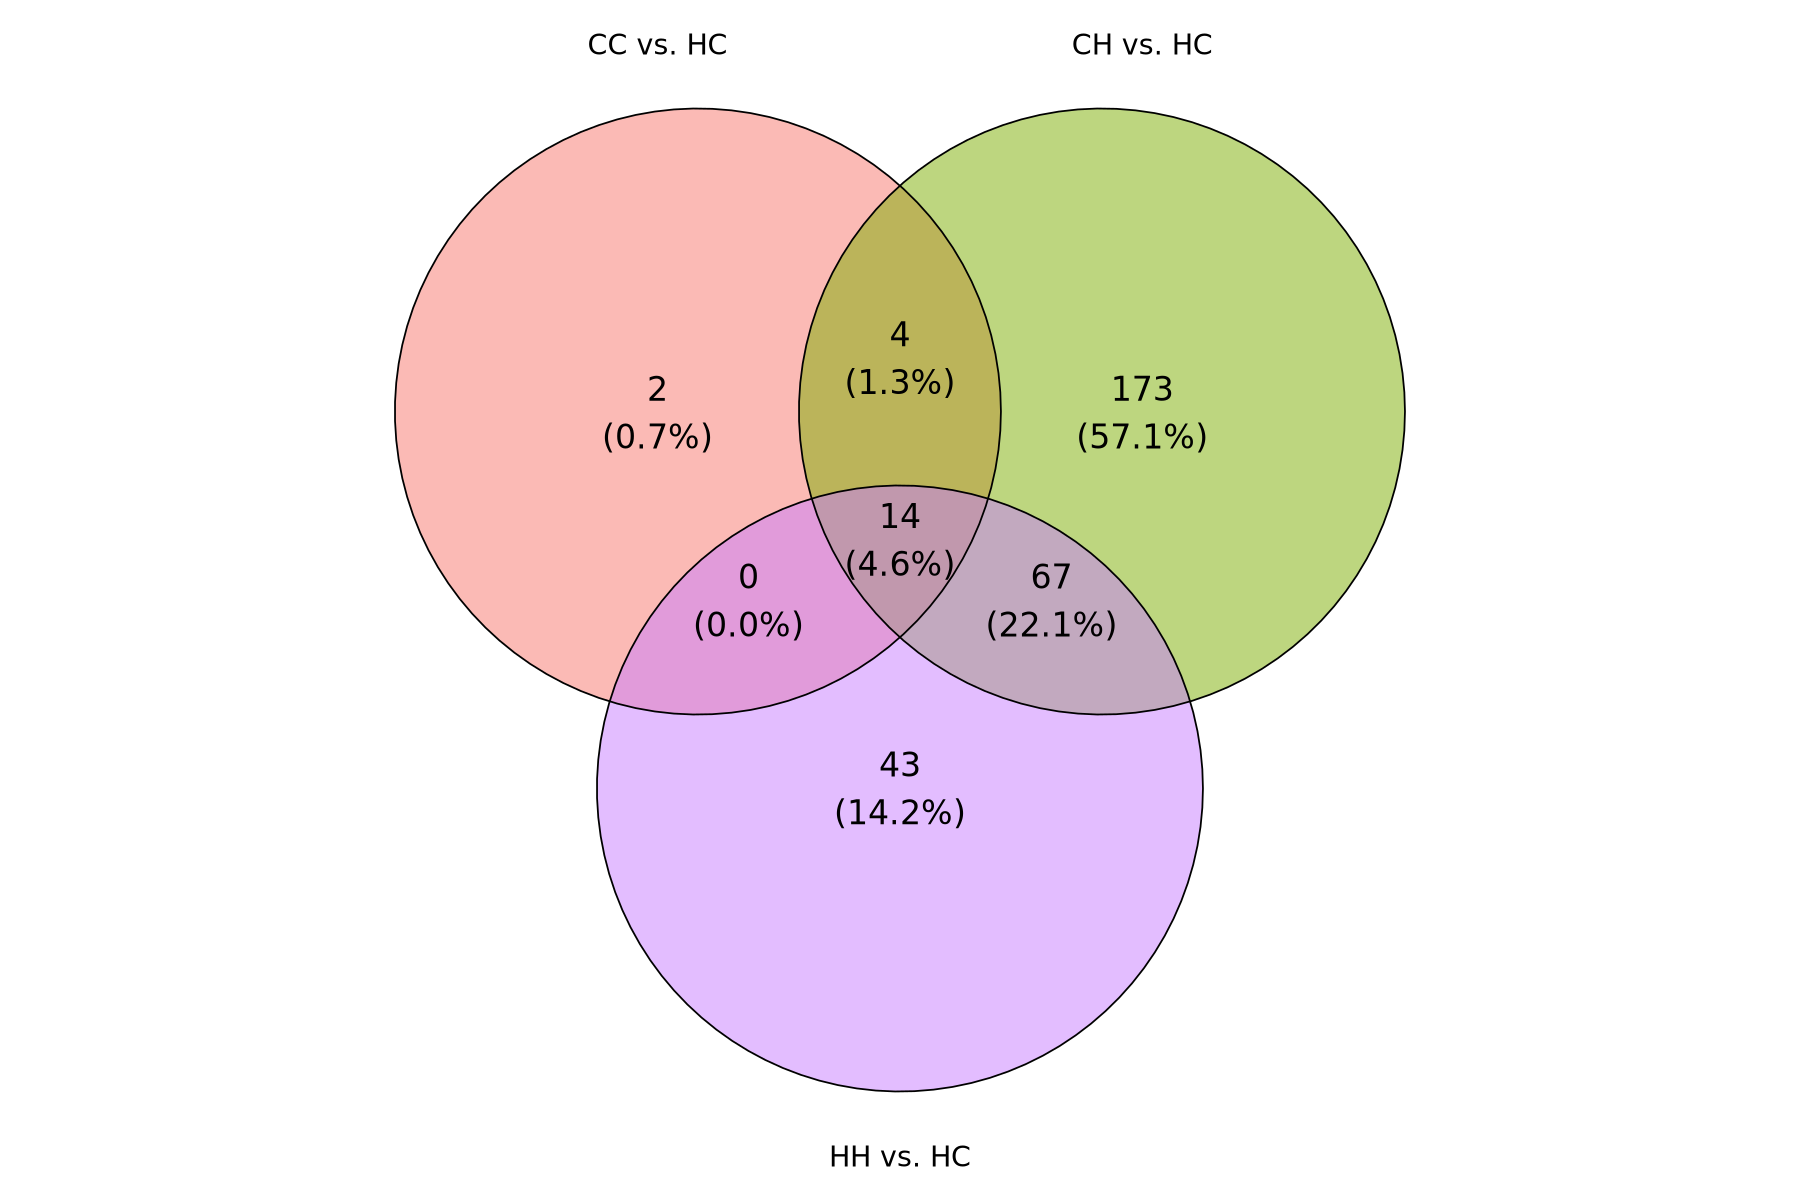

In [18]:
x = list(A = sig_CC_HC$X,
         B = sig_CH_HC$X, 
         C = sig_HH_HC$X)

names(x) <- c('CC vs. HC',
              'CH vs. HC',
              'HH vs. HC')

# same colors as used in the volcano plots
custom_colors <- c('#F8766D',  '#7CAE00', '#C77CFF')

ggvenn(x,
      set_name_size = 6,
       text_size = 7,
      stroke_size = 0.5, 
       show_percentage = TRUE,
      fill_color = custom_colors)

### shared sig DMGs for the pairwise comparisons

In [19]:
# pulling out the 14 shared genes

# Merge the data frames on the 'gene' column
shared_genes14 <- Reduce(function(x, y) merge(x, y, by = "X"), list(sig_CC_HC, sig_CH_HC, sig_HH_HC))

shared_genes14 <- as.data.frame(shared_genes14)
                    
# View the result
dim(shared_genes14)


[1] 14 19

pulling out the **81 shared genes between HH vs. HC and CH vs. HC**

In [20]:
# pulling out the 81 shared genes

# Merge the data frames on the 'gene' column
shared_genes81 <- Reduce(function(x, y) merge(x, y, by = "X"), list(sig_CH_HC, sig_HH_HC))
                    
shared_genes81 <- as.data.frame(shared_genes81)

# View the result
dim(shared_genes81)


[1] 81 13

pulling out the **67 genes shared ONLY between HH vs. HC and CH vs. HC**

In [21]:
# to remove the 14 genes that are shared between all the comparisons, and to only look at those shared between just these two...
shared_genes67 <- shared_genes81[!shared_genes81$X %in% shared_genes14$X, ]
dim(shared_genes67)

[1] 67 13

pulling out the **18 genes shared bewteen CC vs. HC and CH vs. HC**

In [22]:
# pulling out the 18 shared genes

# Merge the data frames on the 'gene' column
shared_genes18 <- Reduce(function(x, y) merge(x, y, by = "X"), list(sig_CC_HC, sig_CH_HC))  
shared_genes18 <- as.data.frame(shared_genes18)

dim(shared_genes18)

[1] 18 13

pulling out the **4 genes shared between ONLY CC vs. HC and CH vs. HC**

In [23]:
# to remove the 4 genes that are shared between all the comparisons, and to only look at those shared between just these two...
shared_genes4 <- shared_genes18[!shared_genes18$X %in% shared_genes14$X, ]
dim(shared_genes4)

[1]  4 13

### unique sig DMGs for pairwise comparison

pulling out the **173 unique sig DMGs for CH vs. HC**

In [24]:
unique_CH_HC <- sig_CH_HC[!sig_CH_HC$X %in% c(shared_genes14$X, shared_genes4$X, shared_genes67$X), ]
dim(unique_CH_HC)

[1] 173   7

pulling out the **2 unique sig DMGs for CC vs. HC**

In [25]:
unique_CC_HC <- sig_CC_HC[!sig_CC_HC$X %in% c(shared_genes14$X, shared_genes4$X), ]
dim(unique_CC_HC)

[1] 2 7

pulling out the **43 unique sig DMGs for HH vs. HC**

In [26]:
unique_HH_HC <- sig_HH_HC[!sig_HH_HC$X %in% c(shared_genes14$X, shared_genes67$X), ]
dim(unique_HH_HC)

[1] 43  7

Now have multiple dfs that contain shared and unique sig DMGs from the Venn diagram of pairwise comparisons with HC

**Shared sig DMGs**:
- shared_genes14 - shared between all 3 comparisons
- shared_genes67 - shared *ONLY* between HH vs. HC and CH vs. HC
- shared_genes81 - shared between HH vs. HC and CH vs. HC (including the 14 that are shared between all)
- shared_genes18 - shared between CC vs. HC and CH vs. HC (including the 14 that are shared between all)
- shared_genes4 - shared *ONLY* between CC vs. HC and CH vs. HC

**Unique sig DMGs**:
- unique_HH_HC - 43 sig DMGs
- unique_CH_HC - 173 sig DMGs
- unique_CC_HC - 2 sig DMGs

## Functional categories of DMGs
Assigning functional categories to DMG

This is being done with [g:Profiler](https://cran.r-project.org/web/packages/gprofiler2/vignettes/gprofiler2.html)

I'm mainly using the **g:GOst tool**, which enables functional profiling of gene lists
- ordered_query = FALSE, meaning the order of genes will *not* be taken into account
- significant = TRUE, returns only the statistically significant results

### shared DMGs

In [27]:
#BiocManager::install("gprofiler2")
library(gprofiler2)

In [28]:
options(repr.plot.width=10, repr.plot.height=5)

shared_genes14 - **14 DMGs shared between all 3 comparisons**

In [29]:
gene_list14 <- shared_genes14$X

# Run g:Profiler analysis
gost_results14 <- gost(gene_list14, organism = "cvgca002022765v4")  # Use the correct organism code


# Check the results
results14 <- gost_results14$result
head(results14)

No results to show
Please make sure that the organism is correct or set significant = FALSE



NULL

there aren't any significant GO terms for these 14 genes... this can happen with small queries of not directly related genes - can instead look at 'All results' to show terms where at least one input gene belongs to.





,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents,short_source
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>,<chr>
1,query_1,FALSE,0.6004943,12,5,1,0.2,0.08333333,GO:0006751,GO:BP,glutathione catabolic process,9567,2477,"GO:0006749, GO:0042219, GO:0043171, GO:0044273",BP
2,query_1,FALSE,0.6004943,12,5,1,0.2,0.08333333,GO:0043171,GO:BP,peptide catabolic process,9567,10920,"GO:0006518, GO:0044248, GO:1901565",BP
3,query_1,FALSE,0.6004943,12,5,1,0.2,0.08333333,GO:0044273,GO:BP,sulfur compound catabolic process,9567,11314,"GO:0006790, GO:0044248",BP
4,query_1,FALSE,0.7002837,14,5,1,0.2,0.07142857,GO:0051170,GO:BP,import into nucleus,9567,13994,GO:0006913,BP
5,query_1,FALSE,0.7002837,14,5,1,0.2,0.07142857,GO:0006606,GO:BP,protein import into nucleus,9567,2350,"GO:0006886, GO:0034504, GO:0051170, GO:0072594",BP
6,query_1,FALSE,0.7002837,14,5,1,0.2,0.07142857,GO:0034504,GO:BP,protein localization to nucleus,9567,8968,GO:0033365,BP


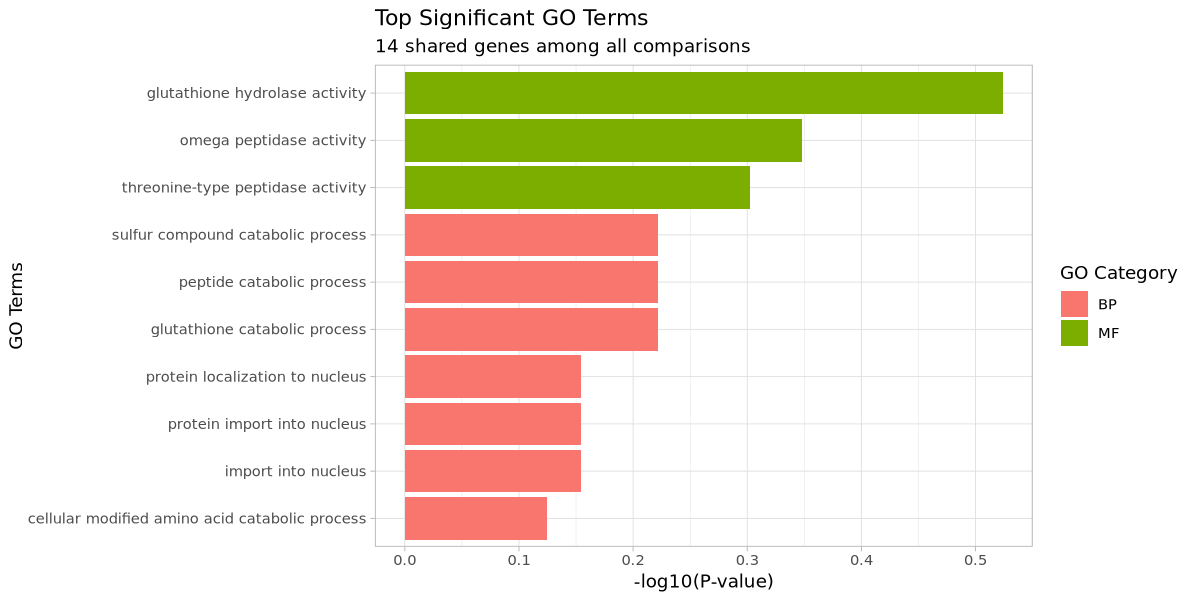

In [30]:
gene_list14 <- shared_genes14$X

# Run g:Profiler analysis
gost_results14 <- gost(gene_list14, organism = "cvgca002022765v4", significant = FALSE)  # Use the correct organism code


# Check the results
results14 <- gost_results14$result
results14 <- results14 %>% mutate(short_source = sub("GO:", "", source))  # Remove "GO:" part
head(results14)

# Create a bar plot of the top 10 significant terms
top_terms14 <- head(results14[order(results14$p_value), ], 10)

ggplot(top_terms14, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = short_source)) +
  geom_bar(stat = "identity") +
  coord_flip() +
scale_fill_manual(values = c('#F8766D',  '#7CAE00', '#C77CFF'), name = "GO Category") +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms",
      subtitle = "14 shared genes among all comparisons") +
  theme_light()


shared_genes67 - **67 DMGs shared ONLY between HH_HC and CH_HC**

In [31]:
gene_list67 <- shared_genes67$X

# Run g:Profiler analysis
gost_results67 <- gost(gene_list67, organism = "cvgca002022765v4", ordered_query = FALSE)  # Use the correct organism code

# Check the results
results67 <- gost_results67$result
results67 <- results67 %>% mutate(short_source = sub("GO:", "", source))  # Remove "GO:" part
head(results67)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents,short_source
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>,<chr>
1,query_1,TRUE,0.002076803,716,13,8,0.6153846,0.011173184,GO:0005737,GO:CC,cytoplasm,5515,309,"GO:0005622, GO:0110165",CC
2,query_1,TRUE,0.007114957,1819,13,11,0.8461538,0.006047279,GO:0005622,GO:CC,intracellular anatomical structure,5515,237,GO:0110165,CC
3,query_1,TRUE,0.013098949,1544,13,10,0.7692308,0.006476684,GO:0043229,GO:CC,intracellular organelle,5515,1881,"GO:0005622, GO:0043226",CC
4,query_1,TRUE,0.014708271,1564,13,10,0.7692308,0.006393862,GO:0043226,GO:CC,organelle,5515,1878,GO:0110165,CC
5,query_1,TRUE,0.028012527,1026,13,8,0.6153846,0.007797271,GO:0043231,GO:CC,intracellular membrane-bounded organelle,5515,1883,"GO:0043227, GO:0043229",CC
6,query_1,TRUE,0.036168568,1064,13,8,0.6153846,0.007518797,GO:0043227,GO:CC,membrane-bounded organelle,5515,1879,GO:0043226,CC


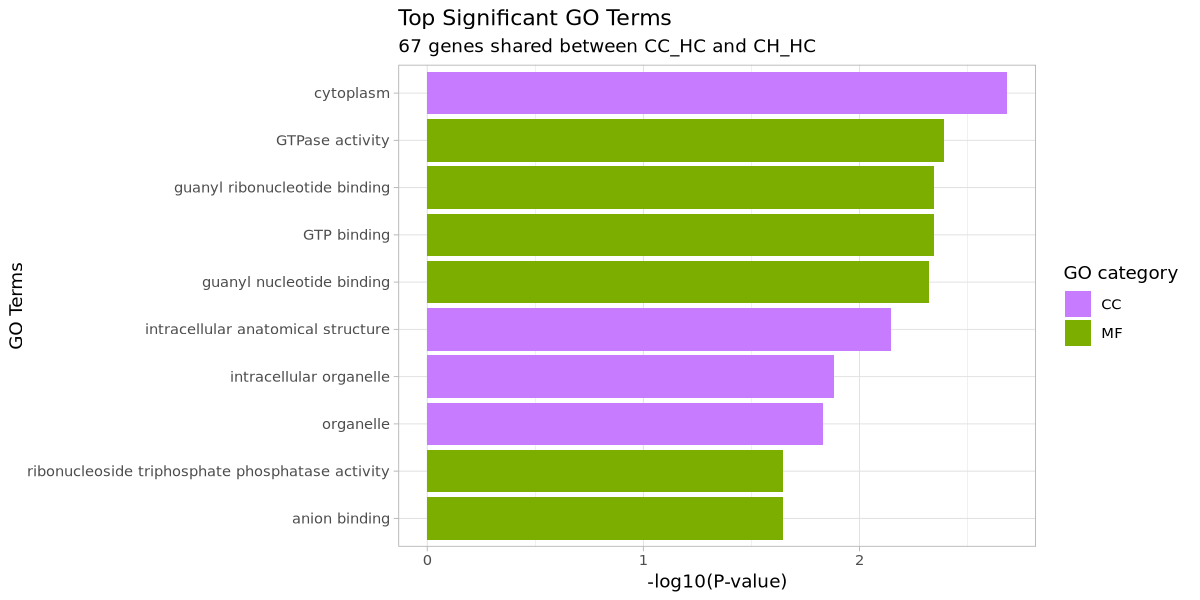

In [32]:
# Create a bar plot of the top 10 significant terms
top_terms67 <- head(results67[order(results67$p_value), ], 10)

ggplot(top_terms67, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = short_source)) +
  geom_bar(stat = "identity") +
scale_fill_manual(values = c('#C77CFF', '#7CAE00'), name = "GO category") +
  coord_flip() +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms",
      subtitle = "67 genes shared between CC_HC and CH_HC") +
  theme_light()




shared_genes81 - **81 DMGs shared between HH_HC and CH_HC** (including the 14 shared between all)

In [33]:
gene_list81 <- shared_genes81$X

# Run g:Profiler analysis
gost_results81 <- gost(gene_list81, organism = "cvgca002022765v4")  # Use the correct organism code

# Check the results
results81 <- gost_results81$result
head(results81)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,TRUE,0.006066216,49,32,4,0.1250000,0.081632653,GO:0072594,GO:BP,establishment of protein localization to organelle,9567,17976,"GO:0033365, GO:0045184"
2,query_1,TRUE,0.012728859,59,32,4,0.1250000,0.067796610,GO:0033365,GO:BP,protein localization to organelle,9567,8456,GO:0008104
3,query_1,TRUE,0.001172991,1819,15,13,0.8666667,0.007146784,GO:0005622,GO:CC,intracellular anatomical structure,5515,237,GO:0110165
4,query_1,TRUE,0.001827954,1544,15,12,0.8000000,0.007772021,GO:0043229,GO:CC,intracellular organelle,5515,1881,"GO:0005622, GO:0043226"
5,query_1,TRUE,0.002105784,1564,15,12,0.8000000,0.007672634,GO:0043226,GO:CC,organelle,5515,1878,GO:0110165
6,query_1,TRUE,0.009370842,716,15,8,0.5333333,0.011173184,GO:0005737,GO:CC,cytoplasm,5515,309,"GO:0005622, GO:0110165"


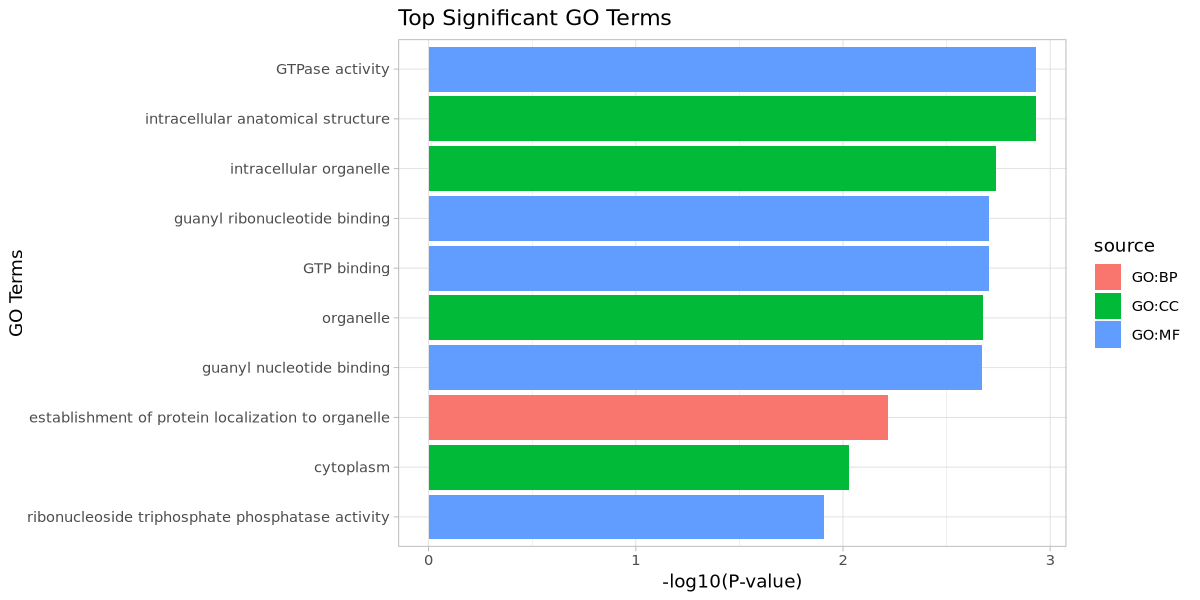

In [34]:
# Create a bar plot of the top 10 significant terms
top_terms81 <- head(results81[order(results81$p_value), ], 10)

ggplot(top_terms81, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = source)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms") +
  theme_light()


shared_genes18 - **shared between CC_HC and CH_HC** (including the 14 shared between all)

In [35]:
gene_list18 <- shared_genes18$X

# Run g:Profiler analysis
gost_results18 <- gost(gene_list18, organism = "cvgca002022765v4")  # Use the correct organism code

# Check the results
results18 <- gost_results18$result
head(results18)

No results to show
Please make sure that the organism is correct or set significant = FALSE



NULL

no significant GO terms in the list of 18 ... looking at all genes

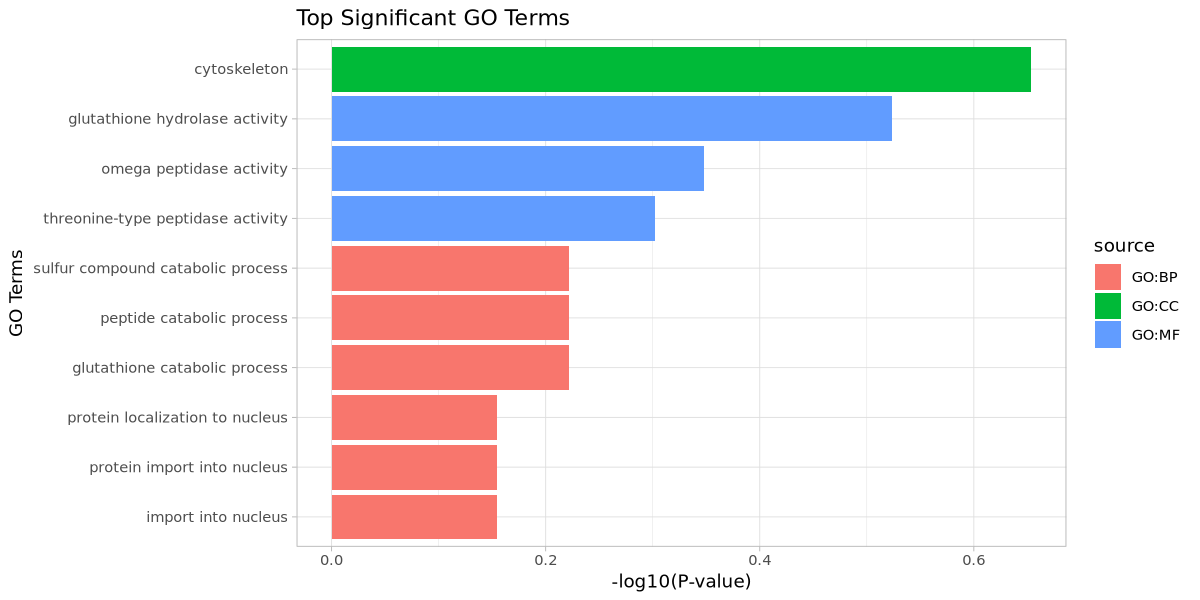

In [38]:
gene_list18 <- shared_genes18$X

# Run g:Profiler analysis
gost_results18 <- gost(gene_list18, organism = "cvgca002022765v4", significant=FALSE)  # Use the correct organism code

# Check the results
results18 <- gost_results18$result

# Create a bar plot of the top 10 significant terms
top_terms18 <- head(results18[order(results18$p_value), ], 10)

ggplot(top_terms18, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = source)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms") +
  theme_light()



shared_genes4 - **shared ONLY between CC_HC and CH_HC**

In [39]:
gene_list4 <- shared_genes4$X

# Run g:Profiler analysis
gost_results4 <- gost(gene_list4, organism = "cvgca002022765v4")  # Use the correct organism code

# Check the results
results4 <- gost_results4$result
results4 <- results4 %>% mutate(short_source = sub("GO:", "", source))  # Remove "GO:" part
head(results4)

No results to show
Please make sure that the organism is correct or set significant = FALSE



ERROR: Error in UseMethod("mutate"): no applicable method for 'mutate' applied to an object of class "NULL"


no significant GO terms in the list of 4...looking at all genes

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents,short_source
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>,<chr>
1,query_1,FALSE,1,5515,1,1,1,0.0001813237,GO:0005575,GO:CC,cellular_component,5515,197,,CC
2,query_1,FALSE,1,1819,1,1,1,0.0005497526,GO:0005622,GO:CC,intracellular anatomical structure,5515,237,GO:0110165,CC
3,query_1,FALSE,1,225,1,1,1,0.0044444444,GO:0005856,GO:CC,cytoskeleton,5515,399,GO:0043232,CC
4,query_1,FALSE,1,1564,1,1,1,0.0006393862,GO:0043226,GO:CC,organelle,5515,1878,GO:0110165,CC
5,query_1,FALSE,1,652,1,1,1,0.0015337423,GO:0043228,GO:CC,non-membrane-bounded organelle,5515,1880,GO:0043226,CC
6,query_1,FALSE,1,1544,1,1,1,0.0006476684,GO:0043229,GO:CC,intracellular organelle,5515,1881,"GO:0005622, GO:0043226",CC


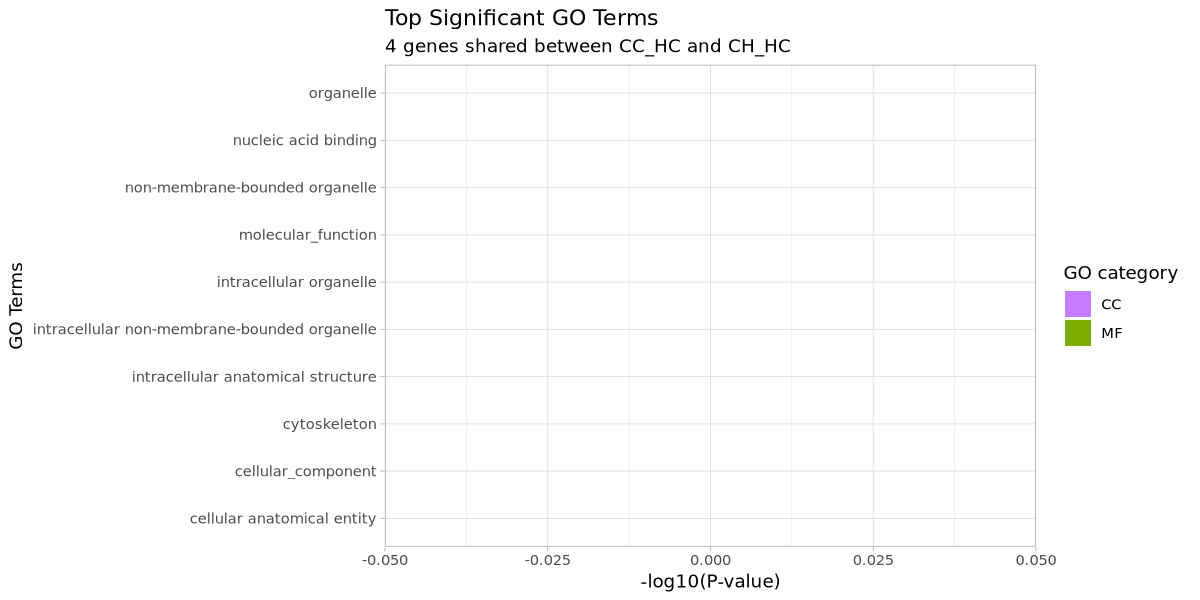

In [40]:
gene_list4 <- shared_genes4$X

# Run g:Profiler analysis
gost_results4 <- gost(gene_list4, organism = "cvgca002022765v4", significant=FALSE)  # Use the correct organism code

# Check the results
results4 <- gost_results4$result
results4 <- results4 %>% mutate(short_source = sub("GO:", "", source))  # Remove "GO:" part
head(results4)

# Create a bar plot of the top 10 significant terms
top_terms4 <- head(results4[order(results4$p_value), ], 10)

ggplot(top_terms4, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = short_source)) +
  geom_bar(stat = "identity") +
  coord_flip() +
scale_fill_manual(values = c('#C77CFF', '#7CAE00'), name = "GO category") +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms",
      subtitle = "4 genes shared between CC_HC and CH_HC") +
  theme_light()

In [41]:
results4$p_value

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1



### unique DMGs

unique_HH_HC - **DMGs unique to HH vs. HC comparison**

(43 sig DMGs)

In [42]:
gene_list43 <- unique_HH_HC$X

# Run g:Profiler analysis
gost_results43 <- gost(gene_list43, organism = "cvgca002022765v4")  # Use the correct organism code

# Check the results
results43 <- gost_results43$result
results43 <- results43 %>% mutate(short_source = sub("GO:", "", source))  # Remove "GO:" part
head(results43)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents,short_source
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>,<chr>
1,query_1,TRUE,0.04004633,9,20,2,0.10000000,0.2222222,GO:0042274,GO:BP,ribosomal small subunit biogenesis,9567,10417,"GO:0022613, GO:0042254",BP
2,query_1,TRUE,0.01412368,14,22,2,0.09090909,0.1428571,GO:0004879,GO:MF,nuclear receptor activity,17566,1143,"GO:0000981, GO:0038023, GO:0098531",MF
3,query_1,TRUE,0.01412368,14,22,2,0.09090909,0.1428571,GO:0098531,GO:MF,ligand-activated transcription factor activity,17566,9141,GO:0003700,MF


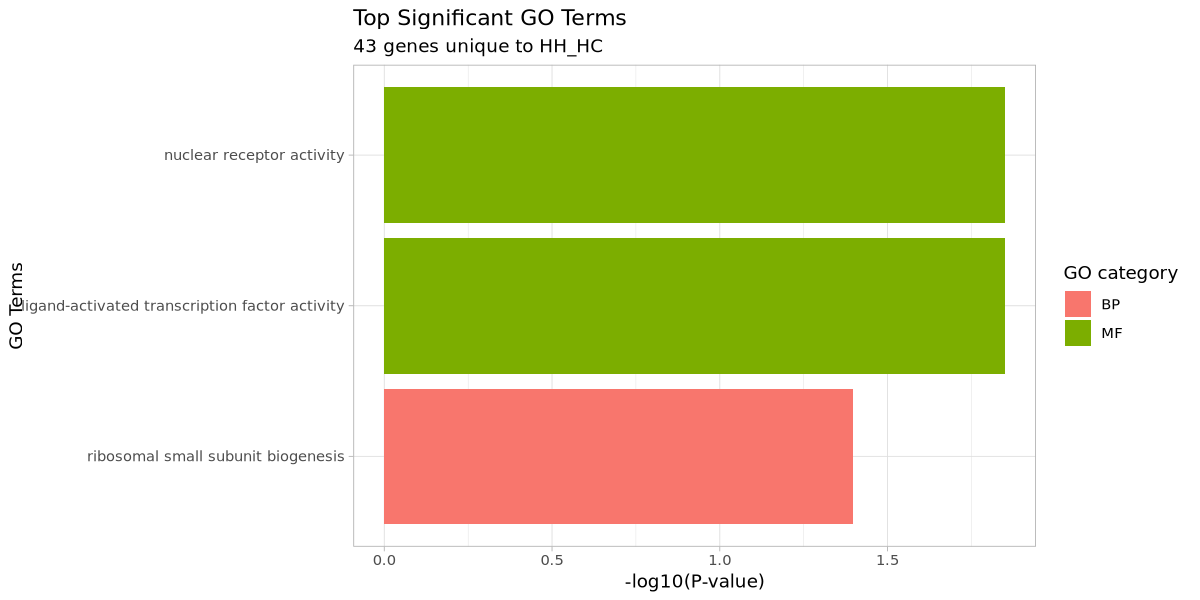

In [43]:
# Create a bar plot of the top 10 significant terms
top_terms43 <- head(results43[order(results43$p_value), ], 10)

ggplot(top_terms43, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = short_source)) +
  geom_bar(stat = "identity") +
  coord_flip() +
scale_fill_manual(values = c('#F8766D',  '#7CAE00', '#C77CFF'), name = "GO category") +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms",
      subtitle = "43 genes unique to HH_HC") +
  theme_light()


looking for top 10, regardless of significance

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents,short_source
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>,<chr>
1,query_1,TRUE,0.04004633,9,20,2,0.10,0.222222222,GO:0042274,GO:BP,ribosomal small subunit biogenesis,9567,10417,"GO:0022613, GO:0042254",BP
2,query_1,FALSE,0.56500527,1,20,1,0.05,1.000000000,GO:0035494,GO:BP,SNARE complex disassembly,9567,9373,"GO:0016192, GO:0032984",BP
3,query_1,FALSE,0.56500527,1,20,1,0.05,1.000000000,GO:0048384,GO:BP,retinoic acid receptor signaling pathway,9567,13144,GO:0030522,BP
4,query_1,FALSE,0.75592290,138,20,3,0.15,0.021739130,GO:0006310,GO:BP,DNA recombination,9567,2138,GO:0006259,BP
5,query_1,FALSE,1.00000000,361,20,1,0.05,0.002770083,GO:0019637,GO:BP,organophosphate metabolic process,9567,6166,"GO:0006793, GO:0071704",BP
6,query_1,FALSE,1.00000000,4,20,1,0.05,0.250000000,GO:0030522,GO:BP,intracellular receptor signaling pathway,9567,7073,GO:0007165,BP


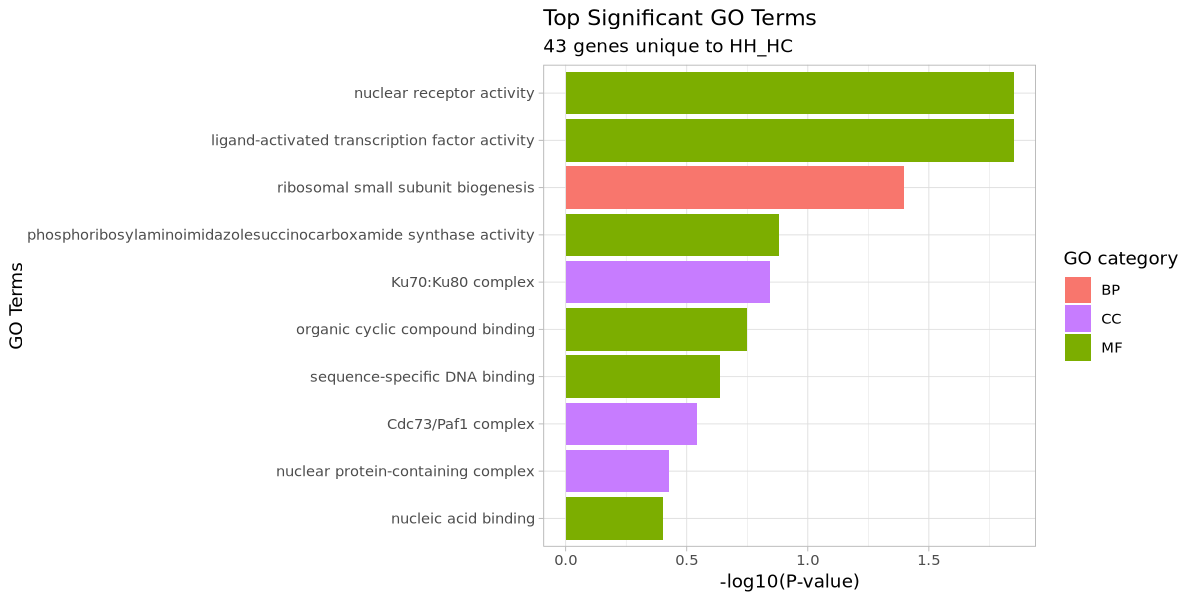

In [44]:
gene_list43 <- unique_HH_HC$X

# Run g:Profiler analysis
gost_results43 <- gost(gene_list43, organism = "cvgca002022765v4", significant=FALSE)  # Use the correct organism code

# Check the results
results43 <- gost_results43$result
results43 <- results43 %>% mutate(short_source = sub("GO:", "", source))  # Remove "GO:" part
head(results43)

# Create a bar plot of the top 10 significant terms
top_terms43 <- head(results43[order(results43$p_value), ], 10)

ggplot(top_terms43, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = short_source)) +
  geom_bar(stat = "identity") +
  coord_flip() +
scale_fill_manual(values = c('#F8766D', '#C77CFF', '#7CAE00'), name = "GO category") +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms",
      subtitle = "43 genes unique to HH_HC") +
  theme_light()

unique_CH_HC - **DMGs unique to CH vs. HC**

(173 sig DMGs)

In [45]:
gene_list173 <- unique_CH_HC$X

# Run g:Profiler analysis
gost_results173 <- gost(gene_list173, organism = "cvgca002022765v4")  # Use the correct organism code

# Check the results
results173 <- gost_results173$result
head(results173)

No results to show
Please make sure that the organism is correct or set significant = FALSE



NULL

no significant GO terms, so looking at not significant

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents,short_source
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>,<chr>
1,query_1,FALSE,0.164762,5,68,2,0.02941176,0.400000000,GO:0006305,GO:BP,DNA alkylation,9567,2133,GO:0006304,BP
2,query_1,FALSE,0.164762,5,68,2,0.02941176,0.400000000,GO:0006306,GO:BP,DNA methylation,9567,2134,"GO:0006305, GO:0043414",BP
3,query_1,FALSE,1.000000,771,68,4,0.05882353,0.005188067,GO:0016043,GO:BP,cellular component organization,9567,5137,GO:0071840,BP
4,query_1,FALSE,1.000000,1200,68,13,0.19117647,0.010833333,GO:0016070,GO:BP,RNA metabolic process,9567,5158,GO:0090304,BP
5,query_1,FALSE,1.000000,167,68,3,0.04411765,0.017964072,GO:0016071,GO:BP,mRNA metabolic process,9567,5159,GO:0016070,BP
6,query_1,FALSE,1.000000,58,68,2,0.02941176,0.034482759,GO:0016072,GO:BP,rRNA metabolic process,9567,5160,GO:0034660,BP


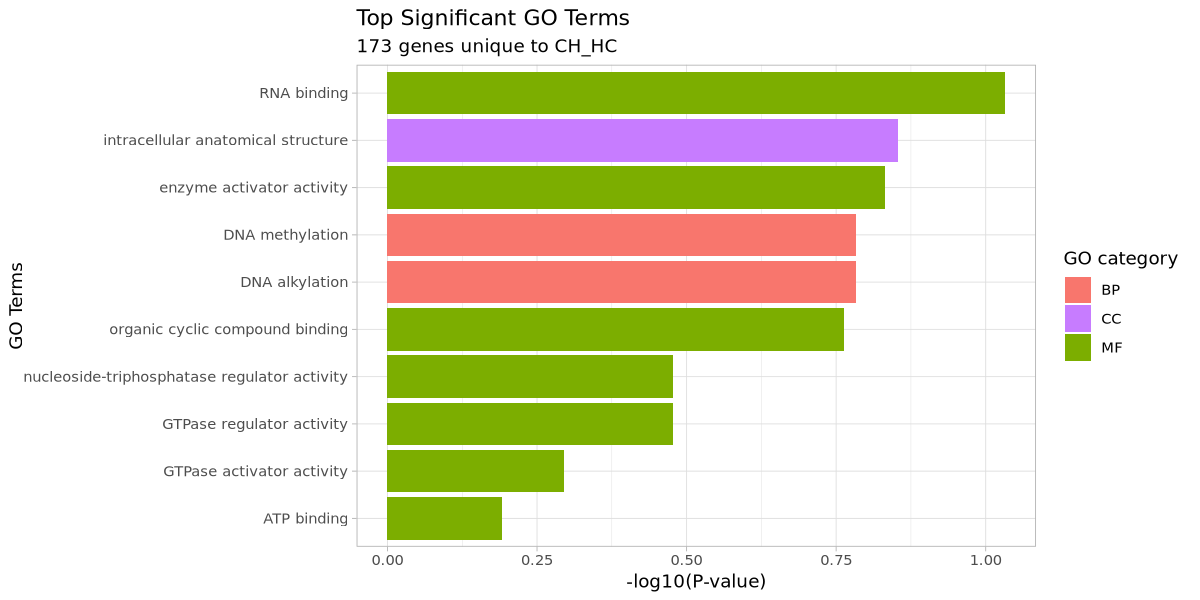

In [46]:
gene_list173 <- unique_CH_HC$X

# Run g:Profiler analysis
gost_results173 <- gost(gene_list173, organism = "cvgca002022765v4", significant=FALSE)  # Use the correct organism code

# Check the results
results173 <- gost_results173$result
results173 <- results173 %>% mutate(short_source = sub("GO:", "", source))  # Remove "GO:" part
head(results173)

# Create a bar plot of the top 10 significant terms
top_terms173 <- head(results173[order(results173$p_value), ], 10)

ggplot(top_terms173, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = short_source)) +
  geom_bar(stat = "identity") +
  coord_flip() +
scale_fill_manual(values = c('#F8766D', '#C77CFF', '#7CAE00'), name = "GO category") +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms",
      subtitle = "173 genes unique to CH_HC") +
  theme_light()

In [54]:
BP_res173 <- filter(results173, results173$source == 'GO:BP')

top_terms_BP173 <- head(BP_res173[order(BP_res173$p_value), ], 10)
top_terms_BP173

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents,short_source
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>,<chr>
1,query_1,FALSE,0.164762,5,68,2,0.02941176,0.400000000,GO:0006305,GO:BP,DNA alkylation,9567,2133,GO:0006304,BP
2,query_1,FALSE,0.164762,5,68,2,0.02941176,0.400000000,GO:0006306,GO:BP,DNA methylation,9567,2134,"GO:0006305, GO:0043414",BP
3,query_1,FALSE,1.000000,771,68,4,0.05882353,0.005188067,GO:0016043,GO:BP,cellular component organization,9567,5137,GO:0071840,BP
4,query_1,FALSE,1.000000,1200,68,13,0.19117647,0.010833333,GO:0016070,GO:BP,RNA metabolic process,9567,5158,GO:0090304,BP
5,query_1,FALSE,1.000000,167,68,3,0.04411765,0.017964072,GO:0016071,GO:BP,mRNA metabolic process,9567,5159,GO:0016070,BP
6,query_1,FALSE,1.000000,58,68,2,0.02941176,0.034482759,GO:0016072,GO:BP,rRNA metabolic process,9567,5160,GO:0034660,BP
7,query_1,FALSE,1.000000,203,68,3,0.04411765,0.014778325,GO:0016192,GO:BP,vesicle-mediated transport,9567,5229,"GO:0006810, GO:0009987",BP
8,query_1,FALSE,1.000000,464,68,7,0.10294118,0.015086207,GO:0016310,GO:BP,phosphorylation,9567,5261,GO:0006796,BP
9,query_1,FALSE,1.000000,80,68,1,0.01470588,0.012500000,GO:0009890,GO:BP,negative regulation of biosynthetic process,9567,3788,"GO:0009058, GO:0009889, GO:0009892",BP


unique_CC_HC - **DMGs unique to CC vs. HC**

(2 sig DMGs)

In [47]:
gene_list2 <- unique_CC_HC$X

# Run g:Profiler analysis
gost_results2 <- gost(gene_list2, organism = "cvgca002022765v4")  # Use the correct organism code

# Check the results
results2 <- gost_results2$result
head(results2)

No results to show
Please make sure that the organism is correct or set significant = FALSE



NULL

no significant GO terms, so looking at not significant

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents,short_source
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>,<chr>
1,query_1,FALSE,0.07466141,3,1,1,1,0.3333333333,GO:0051131,GO:BP,chaperone-mediated protein complex assembly,9567,13956,GO:0065003,BP
2,query_1,FALSE,1.00000000,428,1,1,1,0.0023364486,GO:0044085,GO:BP,cellular component biogenesis,9567,11271,GO:0071840,BP
3,query_1,FALSE,1.00000000,282,1,1,1,0.0035460993,GO:0043933,GO:BP,protein-containing complex organization,9567,11222,GO:0016043,BP
4,query_1,FALSE,1.00000000,350,1,1,1,0.0028571429,GO:0022607,GO:BP,cellular component assembly,9567,6852,"GO:0016043, GO:0044085",BP
5,query_1,FALSE,1.00000000,771,1,1,1,0.0012970169,GO:0016043,GO:BP,cellular component organization,9567,5137,GO:0071840,BP
6,query_1,FALSE,1.00000000,7997,1,1,1,0.0001250469,GO:0009987,GO:BP,cellular process,9567,3849,GO:0008150,BP


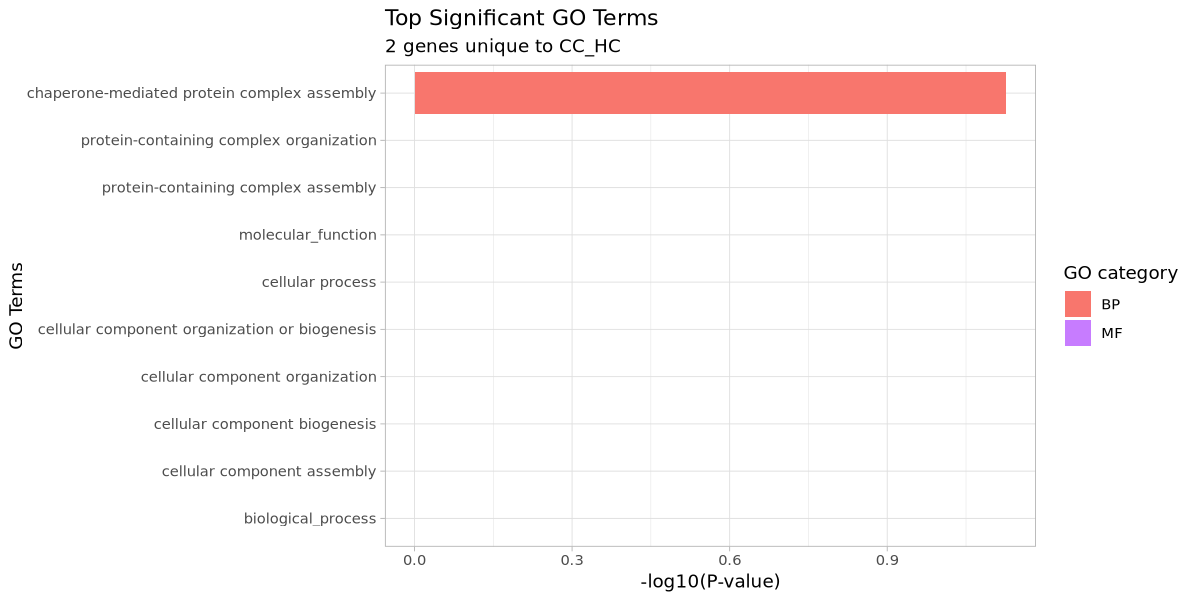

In [48]:
gene_list2 <- unique_CC_HC$X

# Run g:Profiler analysis
gost_results2 <- gost(gene_list2, organism = "cvgca002022765v4", significant=FALSE)  # Use the correct organism code

# Check the results
results2 <- gost_results2$result
results2 <- results2 %>% mutate(short_source = sub("GO:", "", source))  # Remove "GO:" part
head(results2)

# Create a bar plot of the top 10 significant terms
top_terms2 <- head(results2[order(results2$p_value), ], 10)

ggplot(top_terms2, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = short_source)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  scale_fill_manual(values = c('#F8766D', '#C77CFF', '#7CAE00'), name = "GO category") +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms",
      subtitle = "2 genes unique to CC_HC") +
  theme_light()

### better visualization of GO terms?

I'm going to combine the dfs to be able to plot in a grid

In [49]:
top_terms14$OG <- "shared_genes14"
top_terms67$OG <- "shared_genes67"
top_terms4$OG <- "shared_genes4"

######################################

top_terms173$OG <- "unique_CH_HC"
top_terms2$OG <- "unique_CC_HC"
top_terms43$OG <- "unique_HH_HC"

In [50]:
merge_res <- rbind(top_terms14, top_terms67, top_terms4, top_terms173, top_terms2, top_terms43)
head(merge_res)
dim(merge_res)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents,short_source,OG
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>,<chr>,<chr>
99,query_1,FALSE,0.2993235,6,8,1,0.125,0.16666667,GO:0036374,GO:MF,glutathione hydrolase activity,17566,5460,"GO:0008242, GO:0070003",MF,shared_genes14
100,query_1,FALSE,0.4487170,9,8,1,0.125,0.11111111,GO:0008242,GO:MF,omega peptidase activity,17566,1622,GO:0008233,MF,shared_genes14
101,query_1,FALSE,0.4984751,10,8,1,0.125,0.10000000,GO:0070003,GO:MF,threonine-type peptidase activity,17566,8582,GO:0008233,MF,shared_genes14
1,query_1,FALSE,0.6004943,12,5,1,0.200,0.08333333,GO:0006751,GO:BP,glutathione catabolic process,9567,2477,"GO:0006749, GO:0042219, GO:0043171, GO:0044273",BP,shared_genes14
2,query_1,FALSE,0.6004943,12,5,1,0.200,0.08333333,GO:0043171,GO:BP,peptide catabolic process,9567,10920,"GO:0006518, GO:0044248, GO:1901565",BP,shared_genes14
3,query_1,FALSE,0.6004943,12,5,1,0.200,0.08333333,GO:0044273,GO:BP,sulfur compound catabolic process,9567,11314,"GO:0006790, GO:0044248",BP,shared_genes14


[1] 60 16

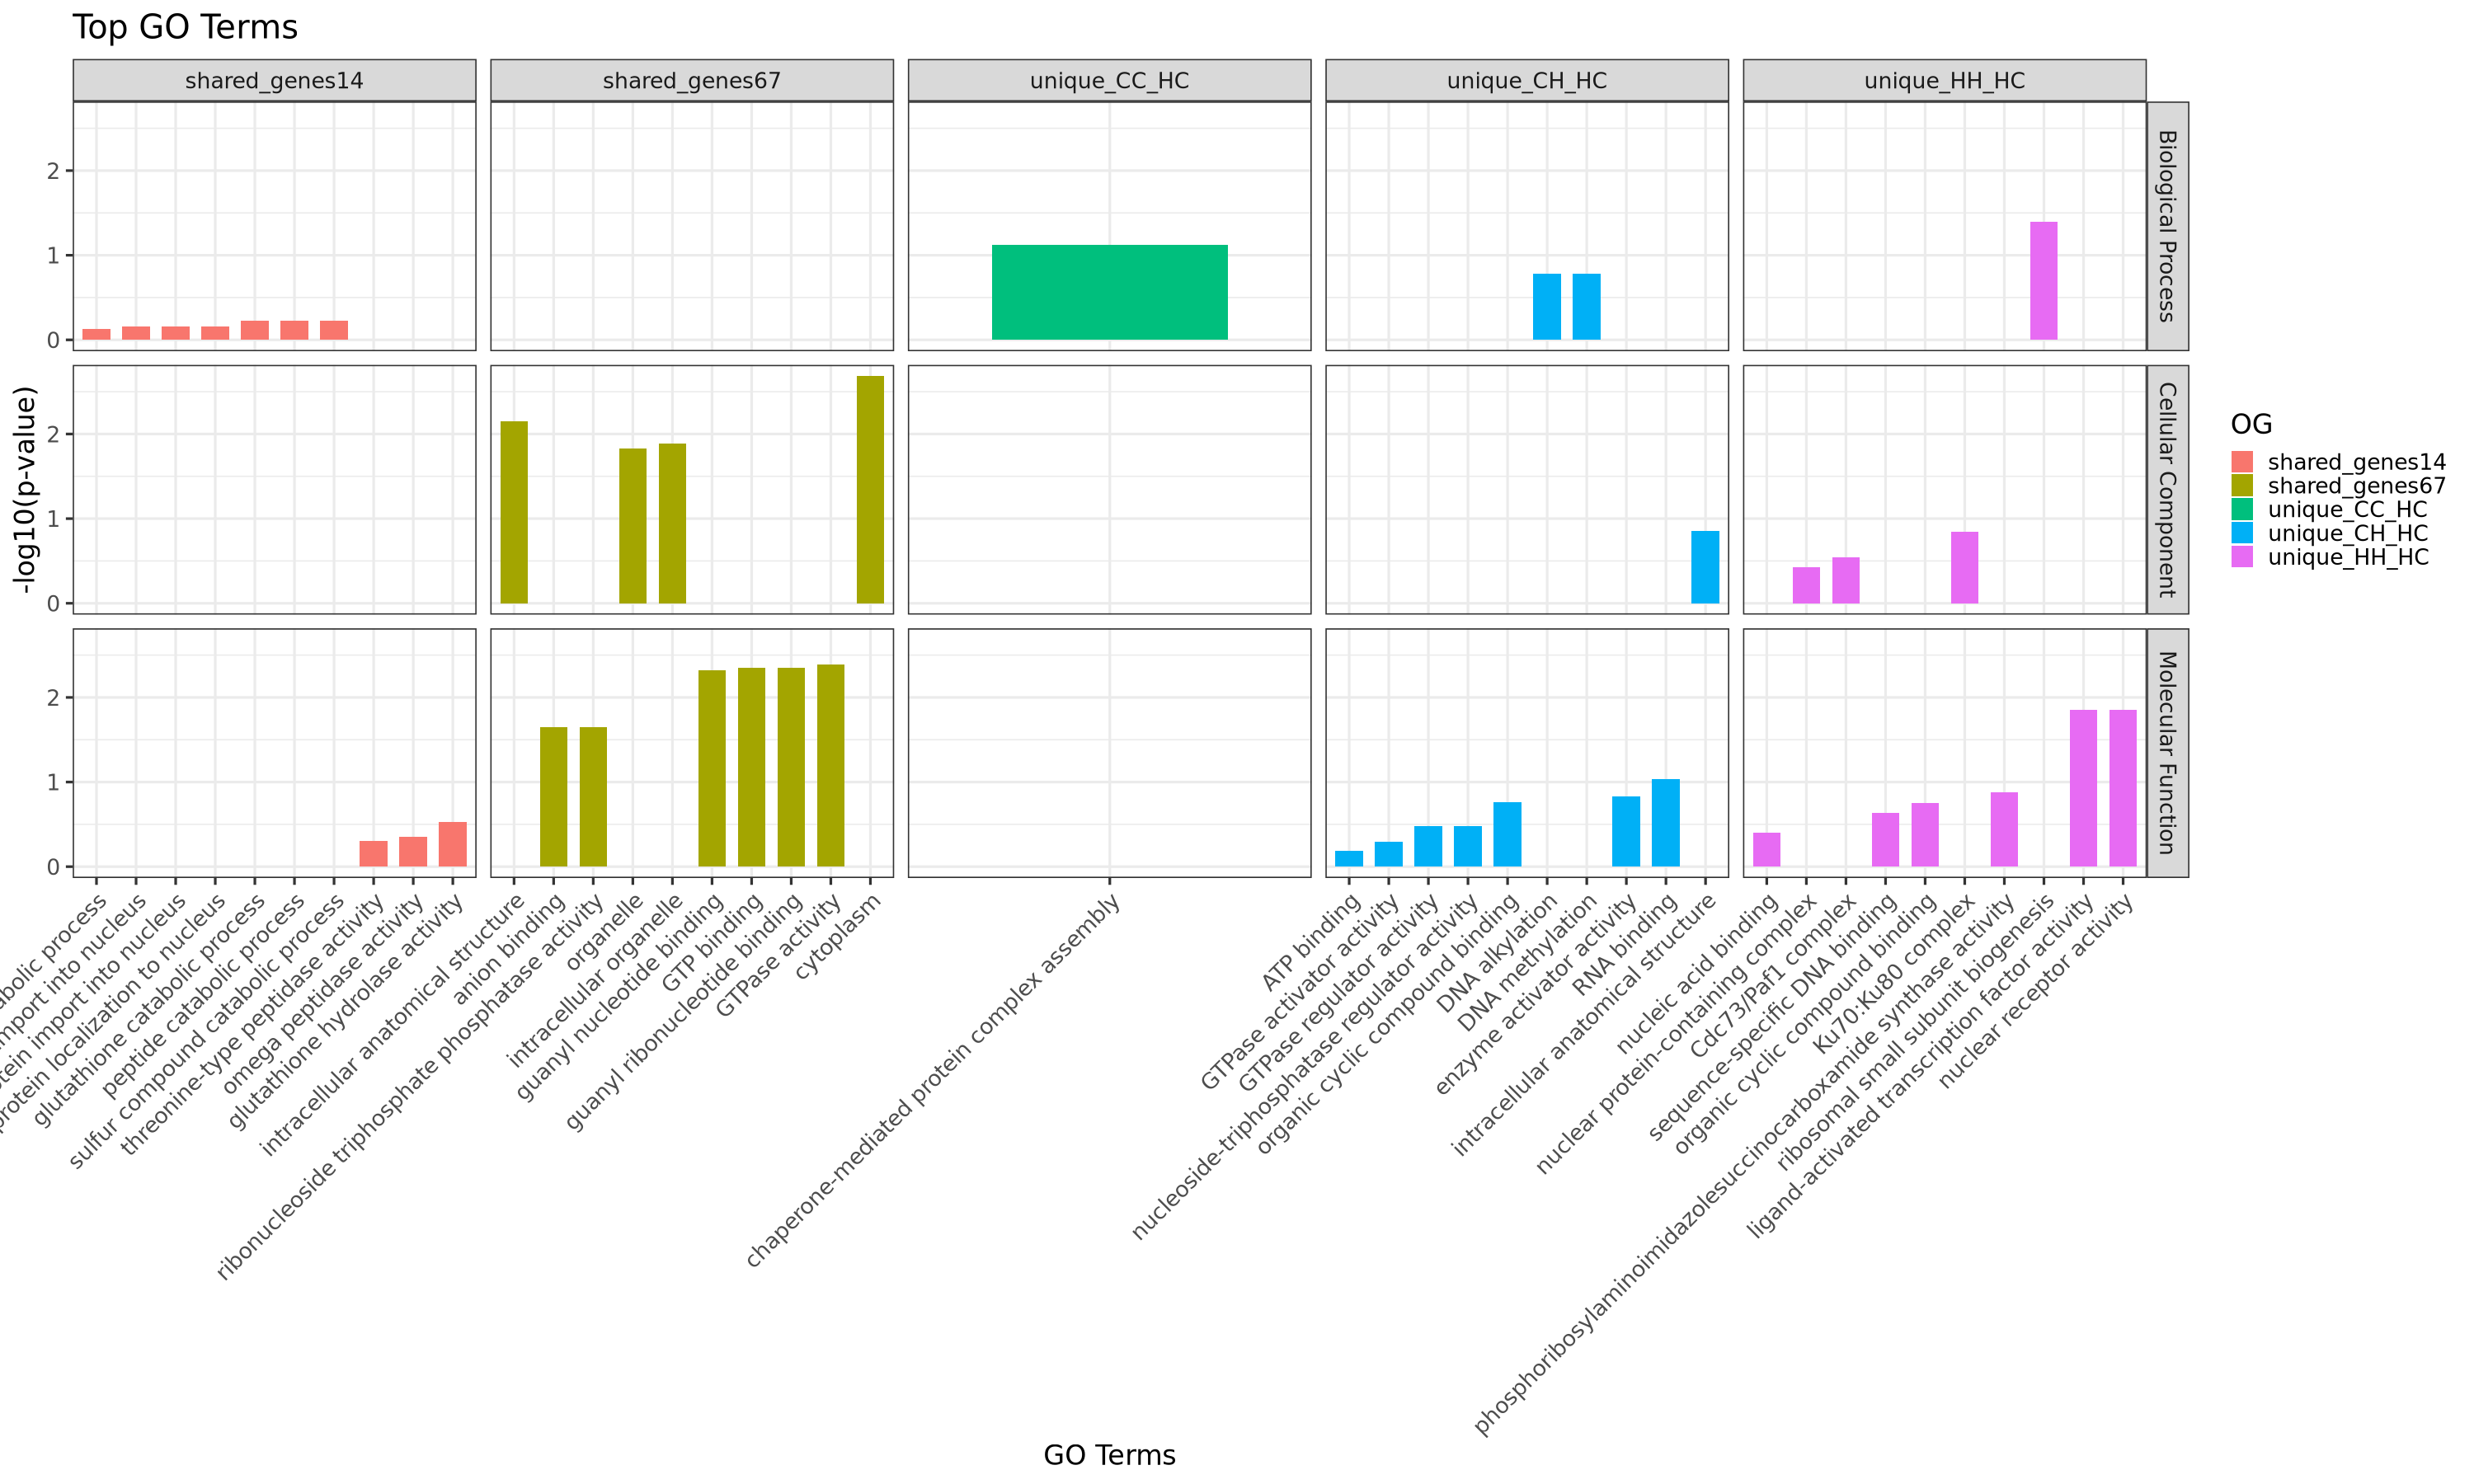

In [51]:
options(repr.plot.width=25, repr.plot.height=15)

filtered_res <- merge_res %>% filter(!is.na(p_value) & -log10(p_value) > 0) 

custom_labels <- c(
  "BP" = "Biological Process",
  "CC" = "Cellular Component",
  "MF" = "Molecular Function"
)

ggplot(filtered_res, aes(x = reorder(term_name, -p_value),  # Reorder based on p_value, assuming OG is the categorical variable
                      y = -log10(p_value),
                      fill = OG)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.7) +
  facet_grid(short_source ~ OG, 
             scales = "free_x",
            labeller = labeller(short_source = custom_labels)) +  # Use OG for facets if it's categorical
  labs(x = "GO Terms",
       y = "-log10(p-value)",
       title = "Top GO Terms") +
  theme_bw(base_size=20) +
theme(axis.text.x = element_text(angle = 45, hjust = 1))


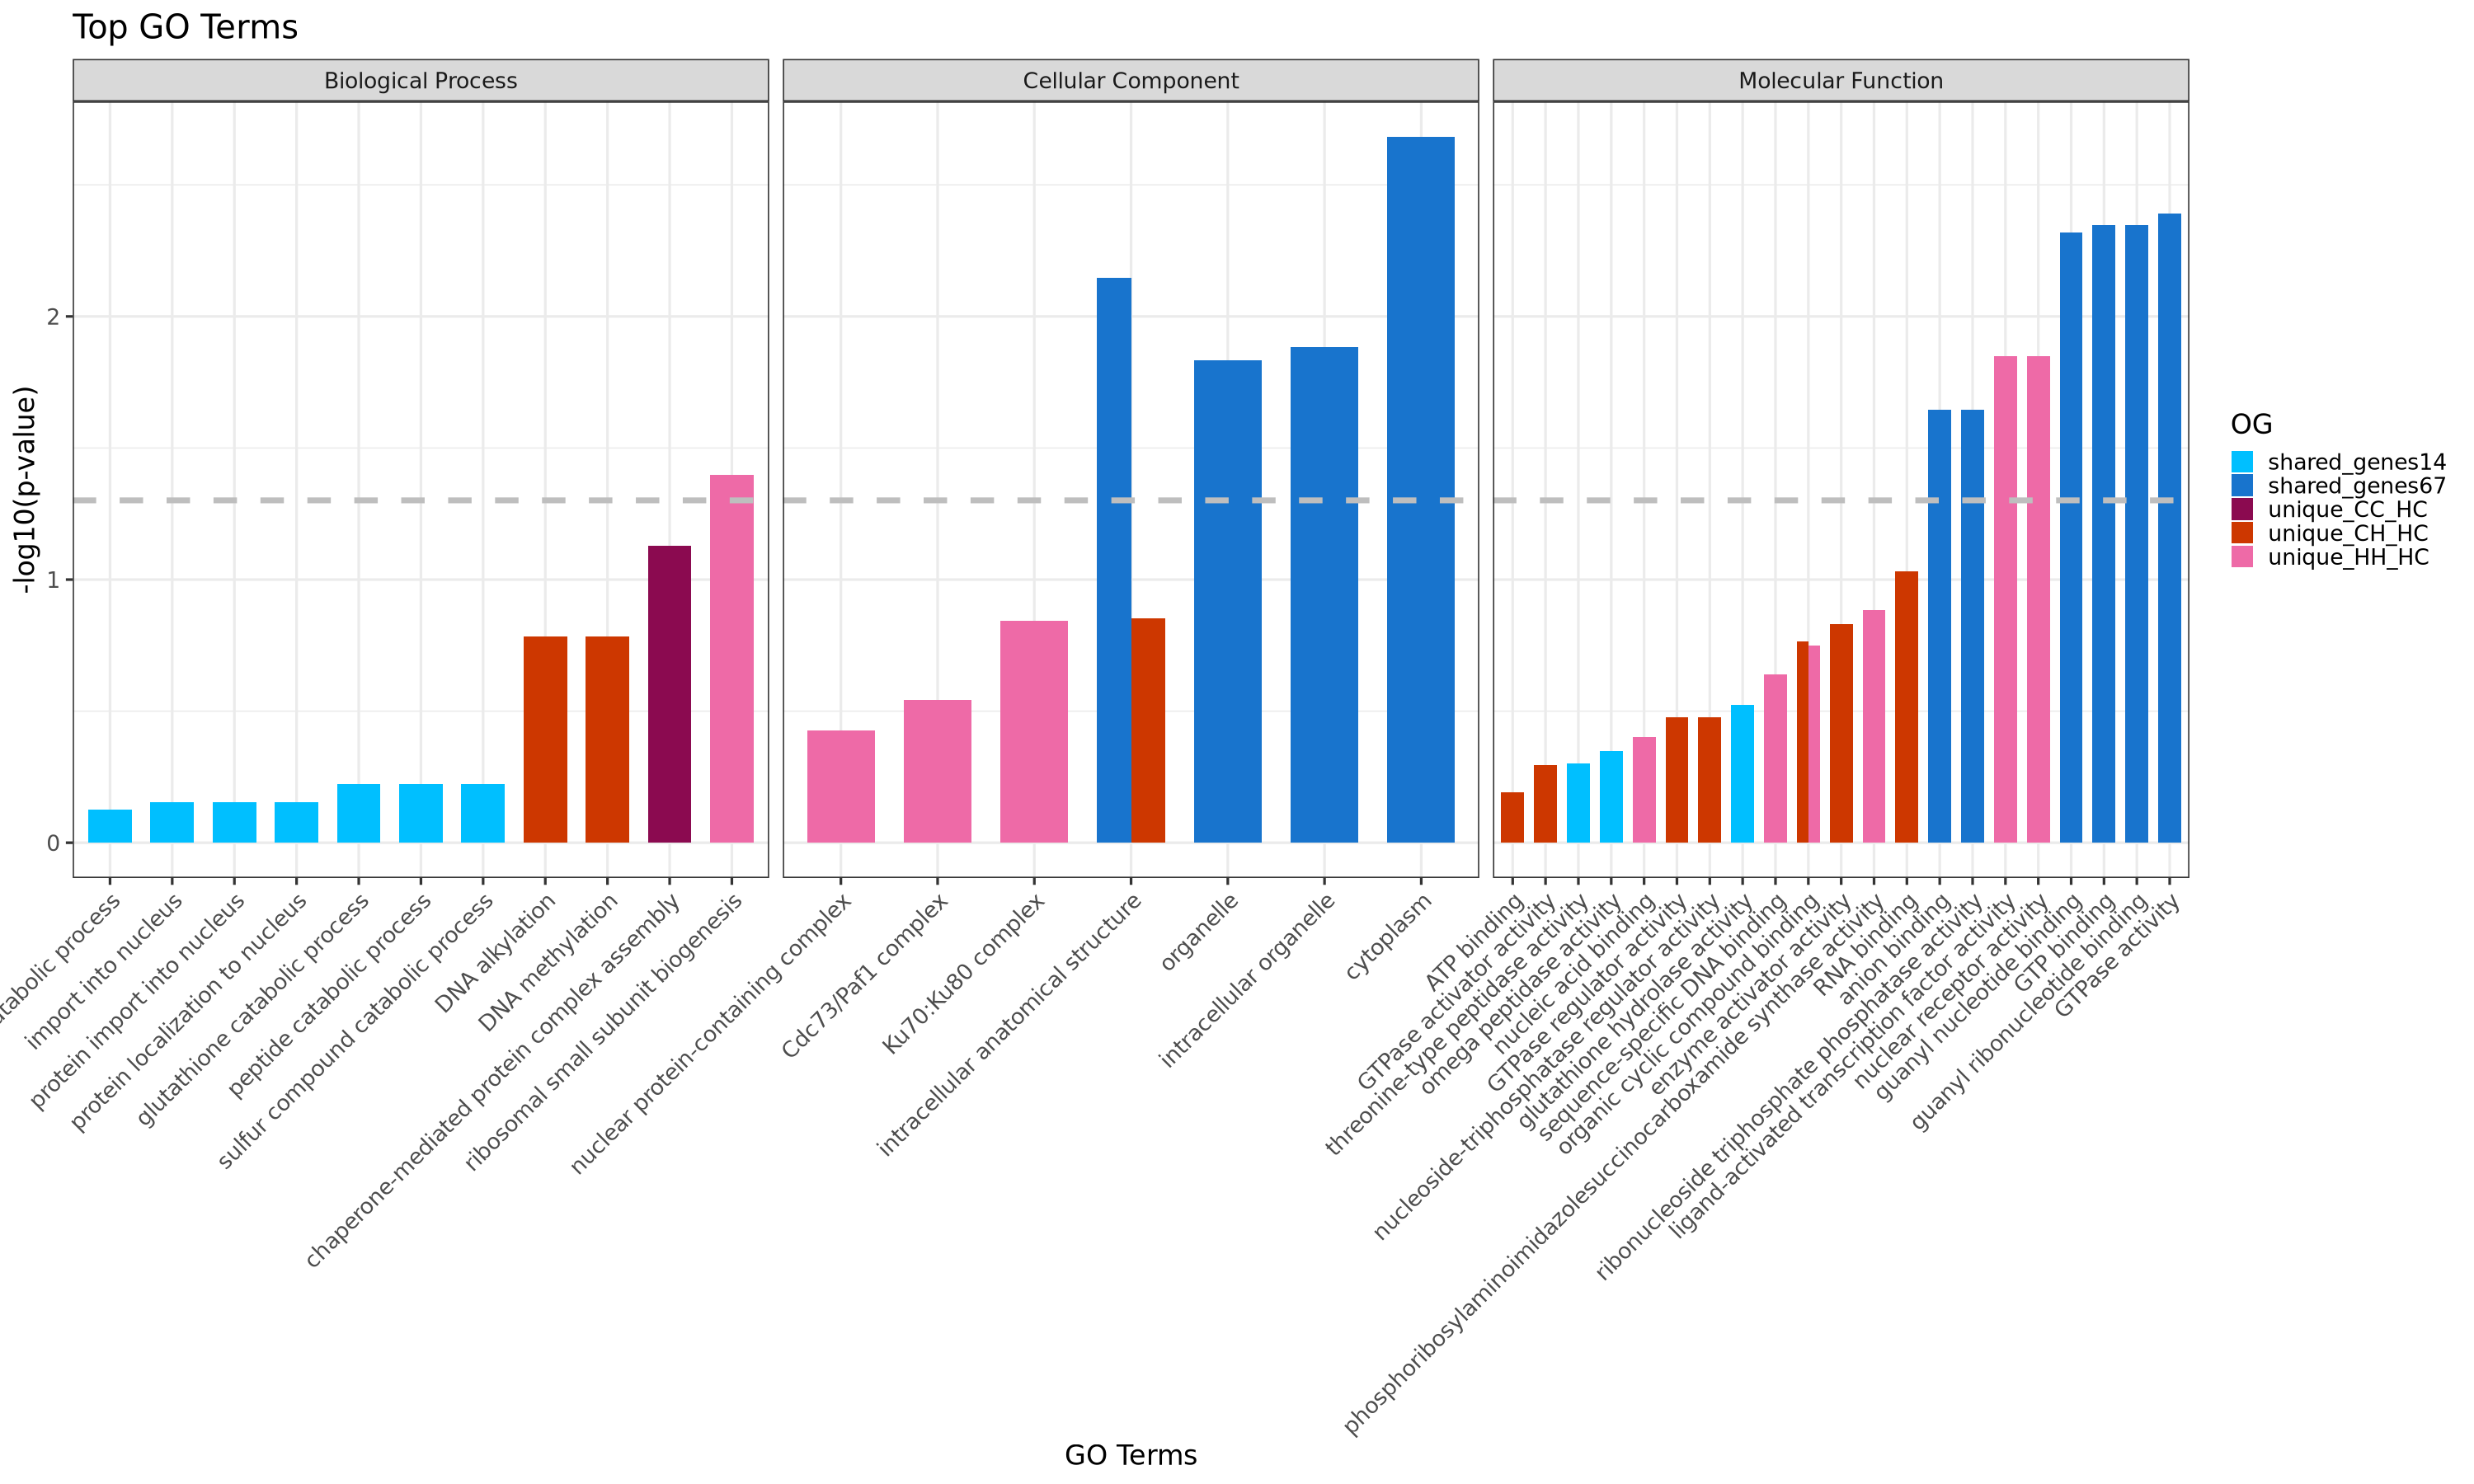

In [52]:
options(repr.plot.width=25, repr.plot.height=15)

filtered_res <- merge_res %>% filter(!is.na(p_value) & -log10(p_value) > 0) 

custom_labels <- c(
  "BP" = "Biological Process",
  "CC" = "Cellular Component",
  "MF" = "Molecular Function"
)

custom_colors <- c(
  "shared_genes14" = "deepskyblue1",  
  "shared_genes67" = "dodgerblue3",  
  "unique_CC_HC" = "deeppink4",  
  "unique_CH_HC" = "orangered3",
    "unique_HH_HC" = "hotpink2"
)

ggplot(filtered_res, aes(x = reorder(term_name, -p_value),  
                      y = -log10(p_value),
                      fill = OG)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.7) +
  facet_grid(~short_source, 
             scales = "free",
            labeller = labeller(short_source = custom_labels)) + 
  labs(x = "GO Terms",
       y = "-log10(p-value)",
       title = "Top GO Terms") +
geom_hline(yintercept = -log10(0.05),
           col = "gray",
           linetype = 'dashed', 
          linewidth = 2) + # significance threshold line
  theme_bw(base_size=20) +
scale_fill_manual(values = custom_colors) +
theme(axis.text.x = element_text(angle = 45, hjust = 1))
